# 2. Data Visualization with Matplotlib and Seaborn

This notebook demonstrates various data visualization techniques using Python's matplotlib and seaborn libraries.

Matplotlib is the primary plotting library for Python. The `pyplot` module provides a MATLAB-like interface for creating plots, charts, and visualizations.

Seaborn is a statistical data visualization library built on top of matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

# Display plots inline in the notebook
%matplotlib inline

## 2.1 Bar Plot

First, we'll create a dataset showing the highest education levels and their corresponding frequencies.

In [2]:
# Define education levels and their frequencies
education_levels = ["Below high school", "High school graduate", 
                   "TAFE degree", "Bachelor's degree", "Postgraduate degree"]
frequencies = [46000, 120000, 75000, 50000, 9000]

# Calculate percentages
percentages = [freq / sum(frequencies) * 100 for freq in frequencies]

# Create a DataFrame
df_edu = pd.DataFrame({
    'Education': education_levels,
    'Frequency': frequencies,
    'Percentage': percentages
})

# Display the DataFrame
print("Education Data:")
print(df_edu)
df_edu

Education Data:
              Education  Frequency  Percentage
0     Below high school      46000   15.333333
1  High school graduate     120000   40.000000
2           TAFE degree      75000   25.000000
3     Bachelor's degree      50000   16.666667
4   Postgraduate degree       9000    3.000000


,Education,Frequency,Percentage
0,Below high school,46000,15.333333
1,High school graduate,120000,40.000000
2,TAFE degree,75000,25.000000
3,Bachelor's degree,50000,16.666667
4,Postgraduate degree,9000,3.000000


### 2.1.1 Education Dataset and Basic Bar Plot

Create a simple bar plot showing education levels vs frequencies. Barcharts are an effective way to visualise categorical and (short finite range) discrete data.

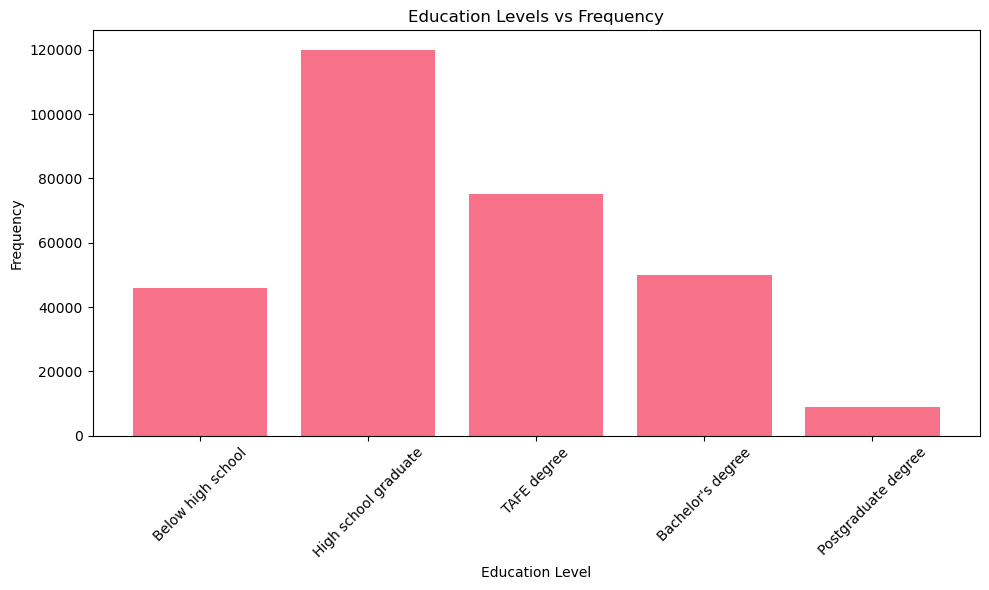

In [3]:
# Create a basic bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_edu['Education'], df_edu['Frequency'])
plt.title('Education Levels vs Frequency')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2.1.2 Styled Bar Plot

Create a bar plot with custom colors and transparency.

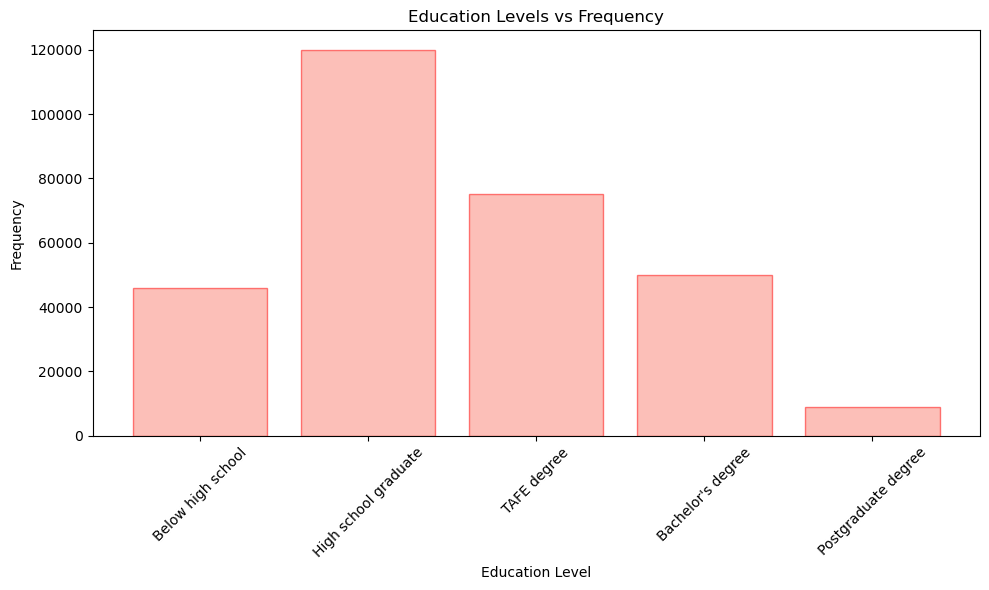

In [4]:
# Create a styled bar plot with custom colors
plt.figure(figsize=(10, 6))
bars = plt.bar(df_edu['Education'], df_edu['Frequency'], 
               color='salmon', edgecolor='red', alpha=0.5)

plt.title('Education Levels vs Frequency')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2.1.3 Horizontal Bar Plot

Create a horizontal bar plot for better readability of long labels.

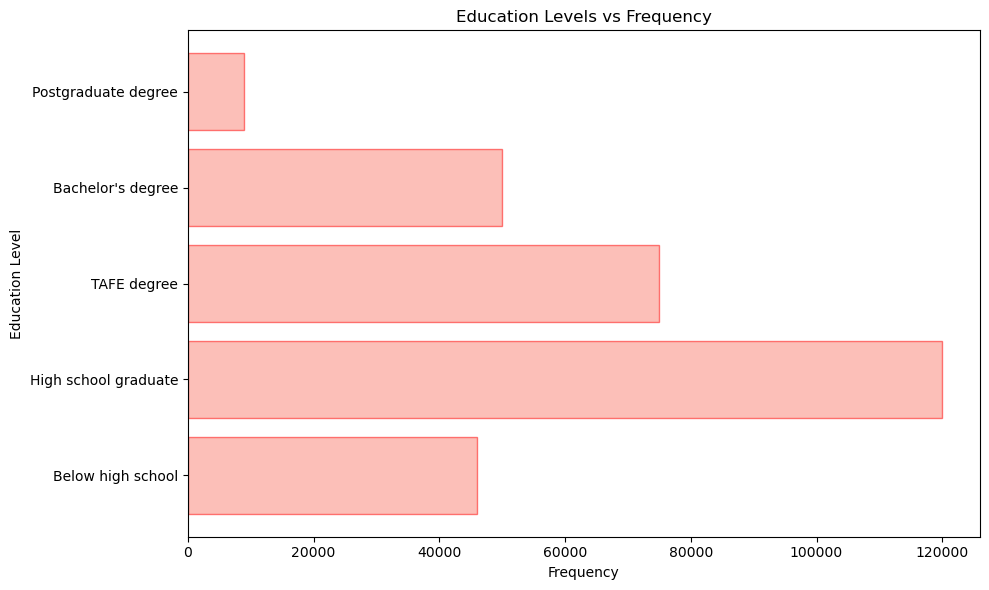

In [5]:
# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df_edu['Education'], df_edu['Frequency'], 
                color='salmon', edgecolor='red', alpha=0.5)

plt.title('Education Levels vs Frequency')
plt.xlabel('Frequency')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

### 2.1.4 Clean Bar Plot with Minimal Theme

Create a clean bar plot with minimal styling and proper formatting.

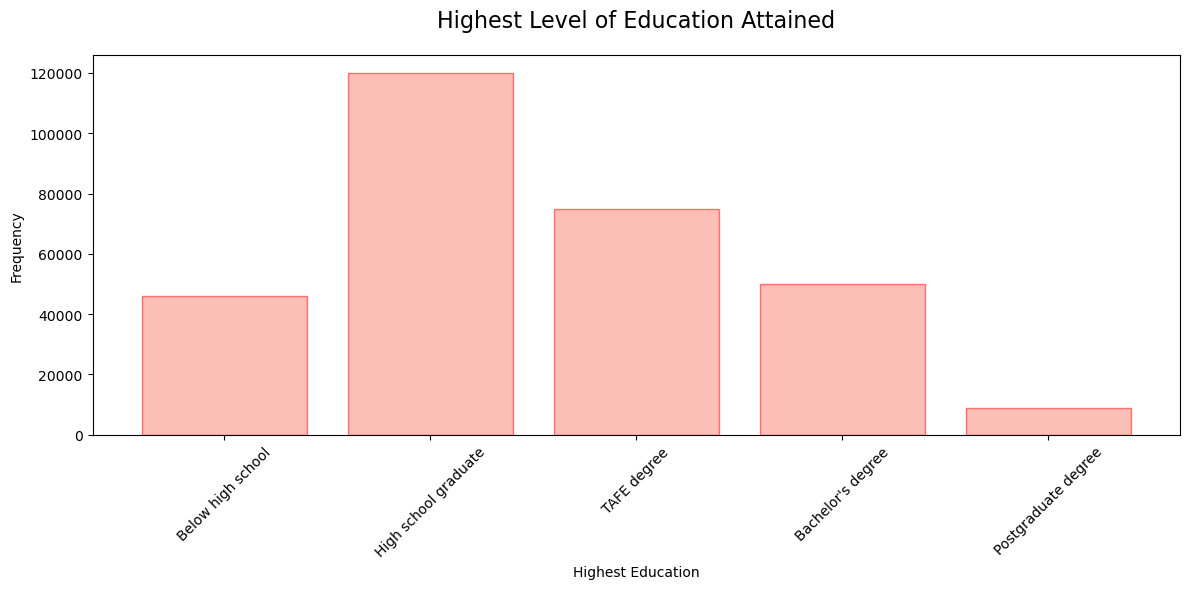

In [6]:
# Create a clean bar plot with minimal theme
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
bars = ax.bar(df_edu['Education'], df_edu['Frequency'], 
              color='salmon', edgecolor='red', alpha=0.5)

# Customize the plot
ax.set_title('Highest Level of Education Attained', fontsize=16, pad=20)
ax.set_xlabel('Highest Education')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

# Remove grid lines for cleaner look
ax.grid(False)

# Adjust layout
plt.tight_layout()
plt.show()

### 2.1.5 Color-Coded Bar Plot

Create a bar plot where each education level has its own color.

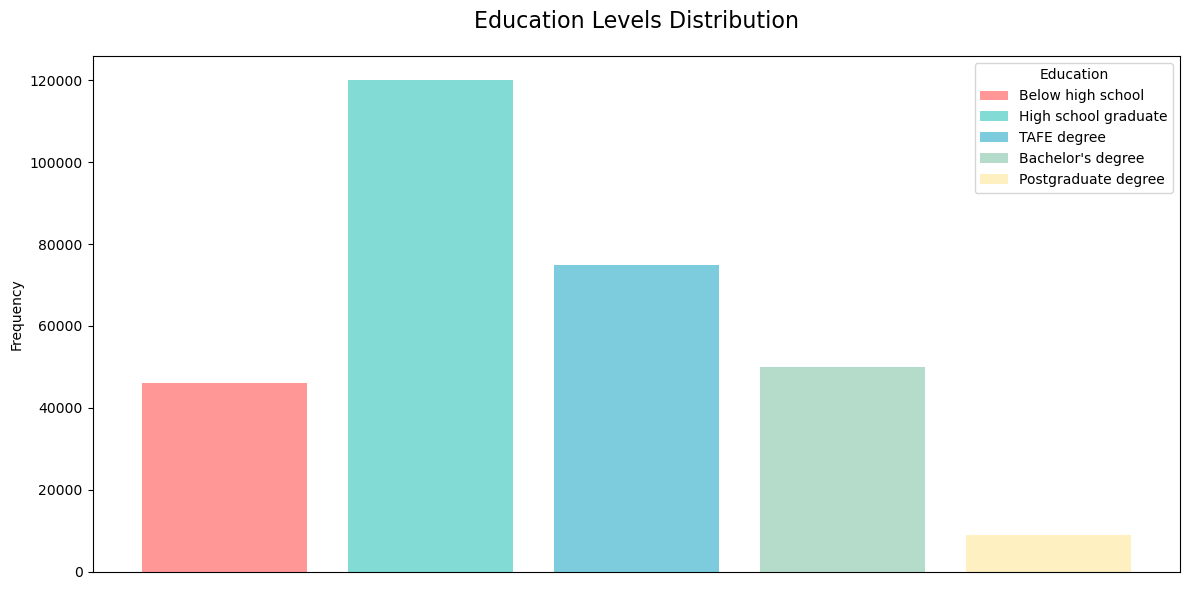

In [7]:
# Create a color-coded bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot with different colors for each category
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
bars = ax.bar(df_edu['Education'], df_edu['Frequency'], 
              color=colors, alpha=0.7)

# Customize the plot
ax.set_title('Education Levels Distribution', fontsize=16, pad=20)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Remove x-axis tick labels and marks for cleaner look
ax.set_xticklabels([])
ax.tick_params(axis='x', which='both', length=0)

# Add legend
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, alpha=0.7) 
                   for color in colors]
ax.legend(legend_elements, df_edu['Education'], 
          title='Education', loc='upper right')

plt.tight_layout()
plt.show()

### 2.2.1 Fish Catching Data Simulation

For the next example, let us generate some random data for the number of herrings caught at Busselton jetty from morning (6-9 am) and evening (5-8 pm) over a span of 150 days. Here, we note that the maximum number of fishers surveyed is 6 in any sampling frame, i.e. discrete data.

In [8]:
# Set random seed for reproducibility
np.random.seed(2)

# Generate fish catching data
fish_caught = np.random.choice(
    range(16),  # Values from 0 to 15
    size=300,   # Number of samples
    replace=True,
    p=[0.11, 0.1, 0.1, 0.09, 0.09, 0.09, 0.09, 0.08, 0.07, 
       0.04, 0.04, 0.04, 0.03, 0.01, 0.01, 0.01]  # Probability weights
)

# Generate number of fishers
num_fisher = np.random.choice(
    range(1, 7),  # Values from 1 to 6
    size=300,
    replace=True,
    p=[0.06, 0.11, 0.16, 0.17, 0.22, 0.28]  # Probability weights
)

# Generate time of day data
time_of_day = np.repeat(['Morning', 'Evening'], 150)

# Create the DataFrame
df_fish = pd.DataFrame({
    'num_fisher': num_fisher,
    'ToD': time_of_day,
    'fish_caught': fish_caught
})

# Convert num_fisher to categorical
df_fish['num_fisher'] = df_fish['num_fisher'].astype('category')

print("Fish Catching Data (first 10 rows):")
print(df_fish.head(10))
print(f"\nTotal rows: {len(df_fish)}")

Fish Catching Data (first 10 rows):
  num_fisher      ToD  fish_caught
0          1  Morning            4
1          4  Morning            0
2          2  Morning            5
3          3  Morning            4
4          6  Morning            4
5          4  Morning            3
6          6  Morning            1
7          2  Morning            6
8          3  Morning            2
9          6  Morning            2

Total rows: 300


### 2.2.2 Aggregate Fish Data by Number of Fishers

Calculate total fish caught for each number of fishers.

In [10]:
# Aggregate total fish caught by number of fishers
tot_fishers = df_fish.groupby('num_fisher')['fish_caught'].sum().reset_index()
tot_fishers.columns = ['num_fisher', 'fish_caught']

print("Total Fish Caught by Number of Fishers:")
print(tot_fishers)
tot_fishers

Total Fish Caught by Number of Fishers:
  num_fisher  fish_caught
0          1           64
1          2          127
2          3          299
3          4          280
4          5          335
5          6          353


/var/folders/6t/sm9t_l250ng6n6pw4318bjlm0000gn/T/ipykernel_32212/3914562088.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tot_fishers = df_fish.groupby('num_fisher')['fish_caught'].sum().reset_index()


,num_fisher,fish_caught
0,1,64
1,2,127
2,3,299
3,4,280
4,5,335
5,6,353


### 2.2.3 Bar Plot of Total Fish Caught

Create a bar plot showing total fish caught for each number of fishers.

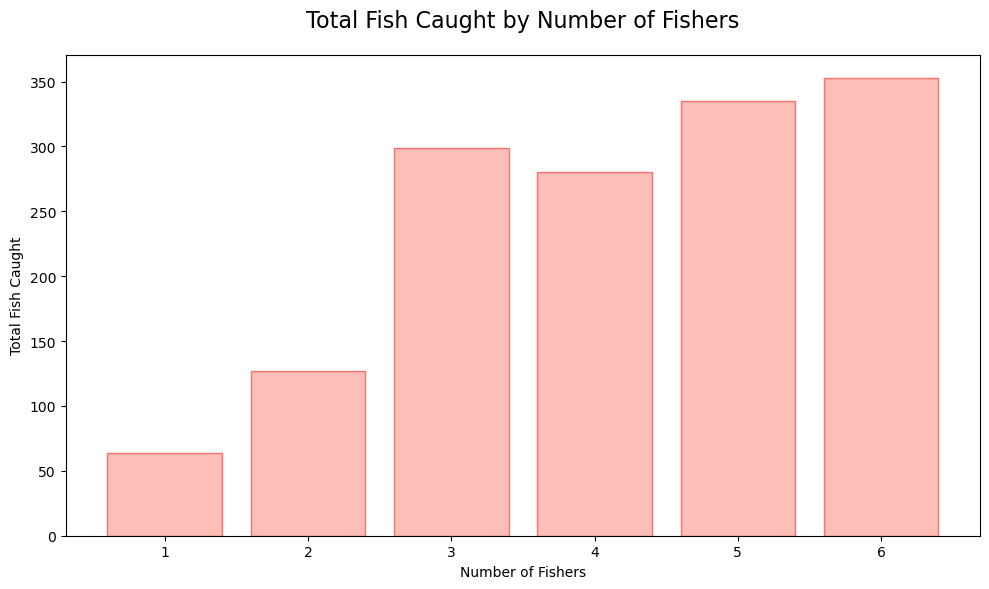

In [16]:
# Create bar plot of total fish caught
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(tot_fishers['num_fisher'], tot_fishers['fish_caught'], 
              color='salmon', edgecolor='red', alpha=0.5)

# Customize the plot
ax.set_title('Total Fish Caught by Number of Fishers', fontsize=16, pad=20)
ax.set_xlabel('Number of Fishers')
ax.set_ylabel('Total Fish Caught')

plt.tight_layout()
plt.show()

### 2.2.4 Aggregate Fish Data by Number of Fishers and Time of Day

Calculate total fish caught for each combination of number of fishers and time of day.

In [17]:
# Aggregate total fish caught by number of fishers and time of day
tot_fishers_tod = df_fish.groupby(['num_fisher', 'ToD'])['fish_caught'].sum().reset_index()
tot_fishers_tod.columns = ['num_fisher', 'ToD', 'fish_caught']

print("Total Fish Caught by Number of Fishers and Time of Day:")
print(tot_fishers_tod)
tot_fishers_tod

Total Fish Caught by Number of Fishers and Time of Day:
   num_fisher      ToD  fish_caught
0           1  Evening           32
1           1  Morning           32
2           2  Evening           54
3           2  Morning           73
4           3  Evening          147
5           3  Morning          152
6           4  Evening          168
7           4  Morning          112
8           5  Evening          163
9           5  Morning          172
10          6  Evening          212
11          6  Morning          141


/var/folders/6t/sm9t_l250ng6n6pw4318bjlm0000gn/T/ipykernel_32212/2099938094.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tot_fishers_tod = df_fish.groupby(['num_fisher', 'ToD'])['fish_caught'].sum().reset_index()


,num_fisher,ToD,fish_caught
0,1,Evening,32
1,1,Morning,32
2,2,Evening,54
3,2,Morning,73
4,3,Evening,147
5,3,Morning,152
6,4,Evening,168
7,4,Morning,112
8,5,Evening,163
9,5,Morning,172


### 2.2.5 Grouped Bar Plot

Create a grouped bar plot showing fish caught by number of fishers, colored by time of day.

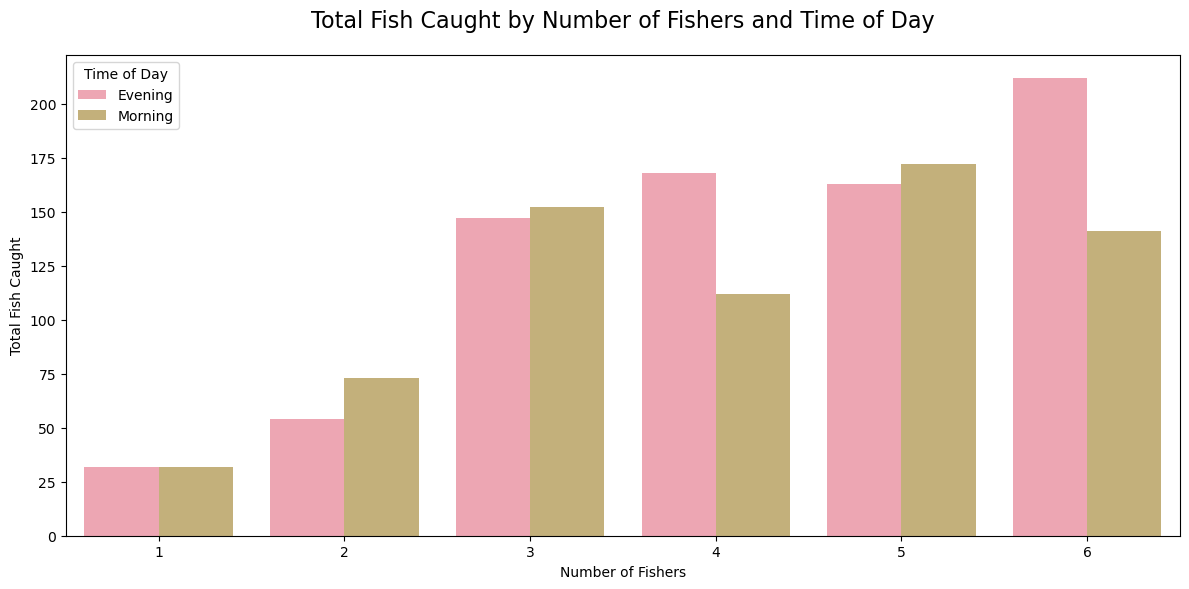

In [18]:
# Create grouped bar plot using seaborn for easier handling
plt.figure(figsize=(12, 6))

# Use seaborn's barplot for easier grouped bar creation
sns.barplot(data=tot_fishers_tod, x='num_fisher', y='fish_caught', hue='ToD', alpha=0.7)

plt.title('Total Fish Caught by Number of Fishers and Time of Day', fontsize=16, pad=20)
plt.xlabel('Number of Fishers')
plt.ylabel('Total Fish Caught')
plt.legend(title='Time of Day')

plt.tight_layout()
plt.show()

### 2.2.6 Dodged Bar Plot with Custom Positioning

Create a dodged bar plot with custom positioning and spacing.

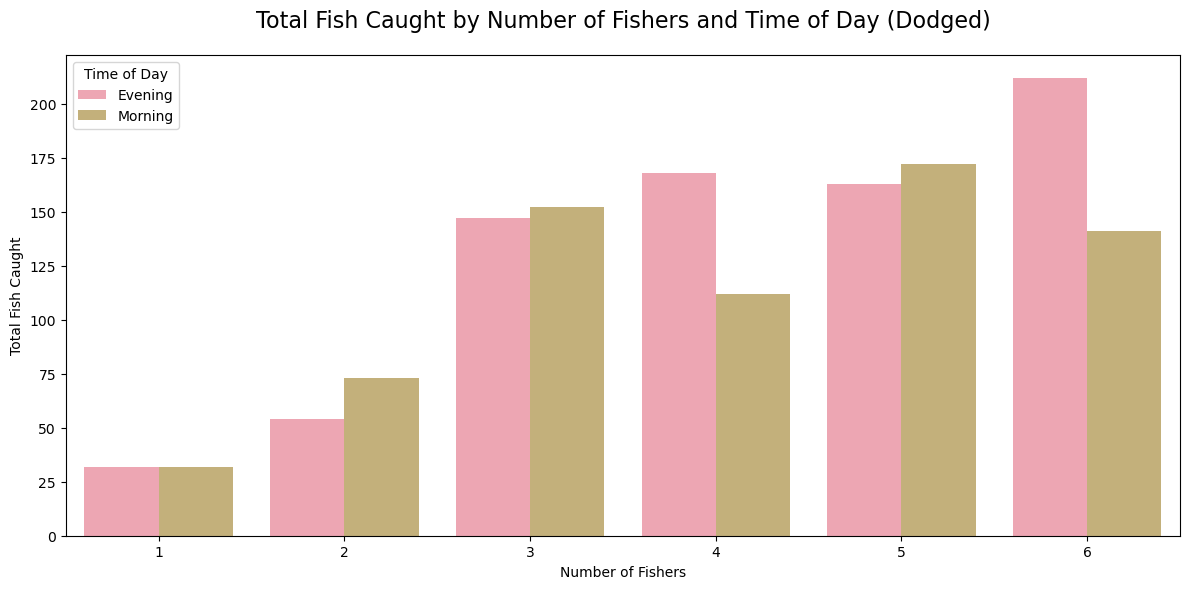

In [19]:
# Create dodged bar plot with custom positioning
plt.figure(figsize=(12, 6))

# Use seaborn's barplot with dodge parameter for better control
sns.barplot(data=tot_fishers_tod, x='num_fisher', y='fish_caught', hue='ToD', 
            alpha=0.7, dodge=True)

plt.title('Total Fish Caught by Number of Fishers and Time of Day (Dodged)', fontsize=16, pad=20)
plt.xlabel('Number of Fishers')
plt.ylabel('Total Fish Caught')
plt.legend(title='Time of Day')

plt.tight_layout()
plt.show()

### 2.2.7 Standard Error Calculation

Next, let us generate a barchart for the mean catch instead of total catch. Furthermore, We will add error bars to the plot. First we need to calculate the mean catch and the standard error of the mean.

In [20]:
# Function to calculate standard error of the mean
def standard_error(x):
    """Calculate standard error of the mean for a given array"""
    return np.std(x) / np.sqrt(len(x))

# Calculate mean catch by number of fishers and time of day
mean_catch = df_fish.groupby(['num_fisher', 'ToD'])['fish_caught'].mean().reset_index()
mean_catch.columns = ['num_fisher', 'ToD', 'fish_caught']

# Calculate standard error of the mean
se_catch = df_fish.groupby(['num_fisher', 'ToD'])['fish_caught'].agg(standard_error).reset_index()
se_catch.columns = ['num_fisher', 'ToD', 'SE']

# Merge mean and standard error data
mean_catch = mean_catch.merge(se_catch, on=['num_fisher', 'ToD'])

# Calculate confidence intervals (lower and upper bounds)
mean_catch['LB'] = mean_catch['fish_caught'] - mean_catch['SE']
mean_catch['UB'] = mean_catch['fish_caught'] + mean_catch['SE']

print("Mean Fish Caught with Standard Errors:")
print(mean_catch)
mean_catch

Mean Fish Caught with Standard Errors:
   num_fisher      ToD  fish_caught        SE        LB        UB
0           1  Evening     6.400000  1.431084  4.968916  7.831084
1           1  Morning     3.555556  0.546845  3.008710  4.102401
2           2  Evening     3.000000  0.765780  2.234220  3.765780
3           2  Morning     4.866667  0.831954  4.034712  5.698621
4           3  Evening     5.653846  0.663821  4.990026  6.317667
5           3  Morning     4.750000  0.602728  4.147272  5.352728
6           4  Evening     5.600000  0.711181  4.888819  6.311181
7           4  Morning     4.869565  0.788155  4.081410  5.657720
8           5  Evening     5.093750  0.718559  4.375191  5.812309
9           5  Morning     5.058824  0.601240  4.457583  5.660064
10          6  Evening     5.435897  0.541256  4.894641  5.977154
11          6  Morning     3.810811  0.538968  3.271843  4.349779


/var/folders/6t/sm9t_l250ng6n6pw4318bjlm0000gn/T/ipykernel_32212/1272574195.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_catch = df_fish.groupby(['num_fisher', 'ToD'])['fish_caught'].mean().reset_index()
/var/folders/6t/sm9t_l250ng6n6pw4318bjlm0000gn/T/ipykernel_32212/1272574195.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  se_catch = df_fish.groupby(['num_fisher', 'ToD'])['fish_caught'].agg(standard_error).reset_index()


,num_fisher,ToD,fish_caught,SE,LB,UB
0,1,Evening,6.400000,1.431084,4.968916,7.831084
1,1,Morning,3.555556,0.546845,3.008710,4.102401
2,2,Evening,3.000000,0.765780,2.234220,3.765780
3,2,Morning,4.866667,0.831954,4.034712,5.698621
4,3,Evening,5.653846,0.663821,4.990026,6.317667
5,3,Morning,4.750000,0.602728,4.147272,5.352728
6,4,Evening,5.600000,0.711181,4.888819,6.311181
7,4,Morning,4.869565,0.788155,4.081410,5.657720
8,5,Evening,5.093750,0.718559,4.375191,5.812309
9,5,Morning,5.058824,0.601240,4.457583,5.660064


### 2.2.8 Bar Plot with Error Bars

Create a bar plot with error bars showing mean fish caught and standard errors.

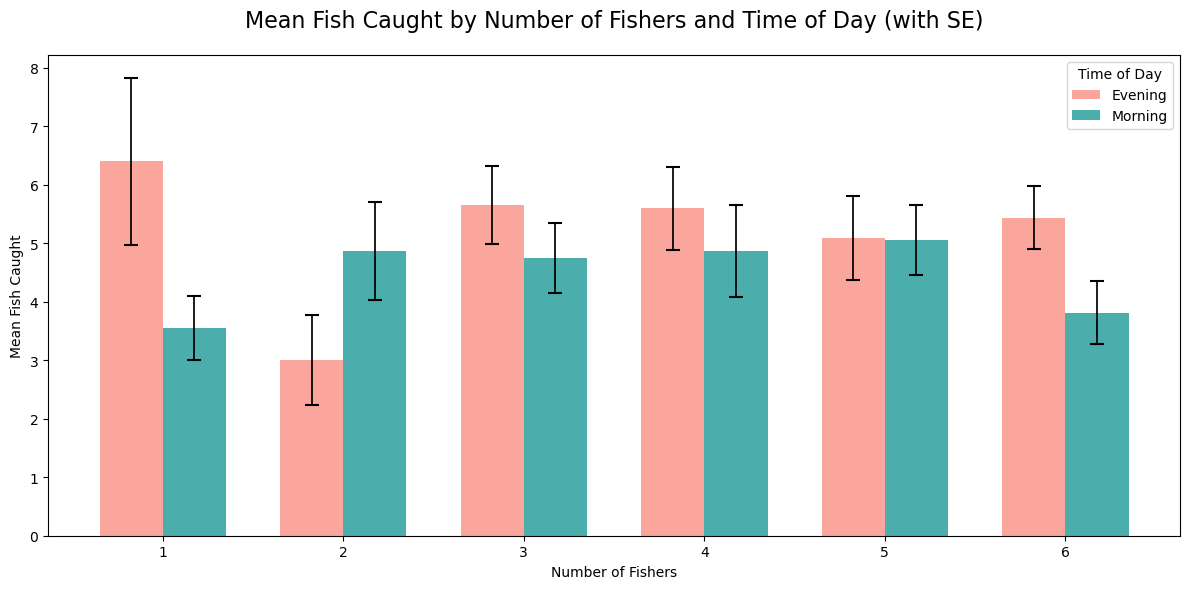

In [21]:
# Create bar plot with error bars
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique values for positioning
fisher_counts = sorted(mean_catch['num_fisher'].unique())
time_periods = mean_catch['ToD'].unique()

# Set up bar positions
x = np.arange(len(fisher_counts))
width = 0.35

# Create bars for each time period with error bars
colors = ['salmon', 'darkcyan']
bars = []

for i, tod in enumerate(time_periods):
    data = mean_catch[mean_catch['ToD'] == tod]
    data = data.sort_values('num_fisher')
    
    # Create bars
    bar = ax.bar(x + i*width, data['fish_caught'], width, 
                 label=tod, color=colors[i], alpha=0.7)
    bars.append(bar)
    
    # Add error bars
    ax.errorbar(x + i*width, data['fish_caught'], 
                yerr=[data['fish_caught'] - data['LB'], data['UB'] - data['fish_caught']],
                fmt='none', color='black', capsize=5, capthick=1.5, linewidth=1.25)

# Customize the plot
ax.set_title('Mean Fish Caught by Number of Fishers and Time of Day (with SE)', fontsize=16, pad=20)
ax.set_xlabel('Number of Fishers')
ax.set_ylabel('Mean Fish Caught')
ax.set_xticks(x + width/2)
ax.set_xticklabels(fisher_counts)
ax.legend(title='Time of Day')

plt.tight_layout()
plt.show()

### 2.2.9 Alternative Error Bar Plot using Seaborn

Create the same error bar plot using seaborn's built-in functionality.

/var/folders/6t/sm9t_l250ng6n6pw4318bjlm0000gn/T/ipykernel_32212/3745446078.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df_fish, x='num_fisher', y='fish_caught', hue='ToD',


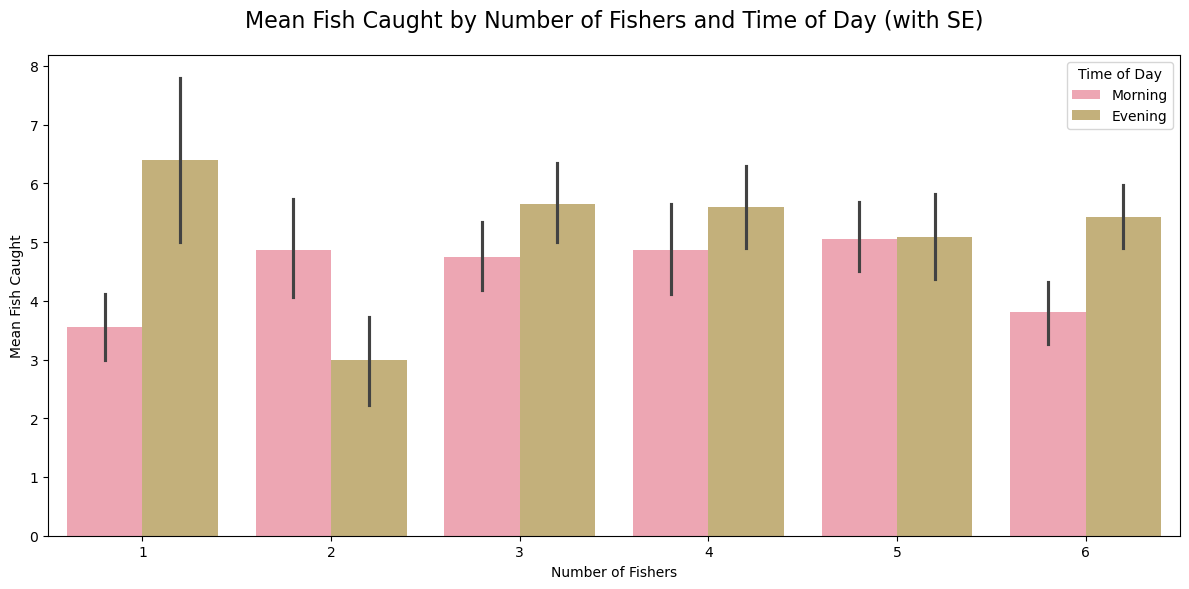

In [22]:
# Create error bar plot using seaborn
plt.figure(figsize=(12, 6))

# Use seaborn's barplot with error bars
sns.barplot(data=df_fish, x='num_fisher', y='fish_caught', hue='ToD', 
            alpha=0.7, ci=68)  # ci=68 gives approximately 1 standard error

plt.title('Mean Fish Caught by Number of Fishers and Time of Day (with SE)', fontsize=16, pad=20)
plt.xlabel('Number of Fishers')
plt.ylabel('Mean Fish Caught')
plt.legend(title='Time of Day')

plt.tight_layout()
plt.show()

Exercise: Compare the barcharts for total catch and mean catch. What is the difference between the two plots and what can you conclude about the catch rate and catch total and how they vary across time and with increasing number of fishers?

### 2.2.10 Summary Statistics

Display summary statistics for the fish catching data.

In [23]:
# Display summary statistics
print("Summary Statistics by Number of Fishers:")
summary_by_fishers = df_fish.groupby('num_fisher')['fish_caught'].agg(['count', 'mean', 'std', 'min', 'max'])
print(summary_by_fishers)

print("\nSummary Statistics by Time of Day:")
summary_by_time = df_fish.groupby('ToD')['fish_caught'].agg(['count', 'mean', 'std', 'min', 'max'])
print(summary_by_time)

print("\nSummary Statistics by Number of Fishers and Time of Day:")
summary_combined = df_fish.groupby(['num_fisher', 'ToD'])['fish_caught'].agg(['count', 'mean', 'std', 'min', 'max'])
print(summary_combined)

Summary Statistics by Number of Fishers:
            count      mean       std  min  max
num_fisher                                     
1              14  4.571429  2.793241    1   11
2              33  3.848485  3.419806    0   13
3              58  5.155172  3.458028    0   13
4              53  5.283019  3.899592    0   14
5              66  5.075758  3.816203    0   15
6              76  4.644737  3.451392    0   15

Summary Statistics by Time of Day:
         count      mean       std  min  max
ToD                                         
Evening    150  5.173333  3.732223    0   15
Morning    150  4.546667  3.416475    0   15

Summary Statistics by Number of Fishers and Time of Day:
                    count      mean       std  min  max
num_fisher ToD                                         
1          Evening      5  6.400000  3.577709    1   11
           Morning      9  3.555556  1.740051    2    6
2          Evening     18  3.000000  3.343123    0   10
           Morning   

/var/folders/6t/sm9t_l250ng6n6pw4318bjlm0000gn/T/ipykernel_32212/2609256162.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_by_fishers = df_fish.groupby('num_fisher')['fish_caught'].agg(['count', 'mean', 'std', 'min', 'max'])
/var/folders/6t/sm9t_l250ng6n6pw4318bjlm0000gn/T/ipykernel_32212/2609256162.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_combined = df_fish.groupby(['num_fisher', 'ToD'])['fish_caught'].agg(['count', 'mean', 'std', 'min', 'max'])


### 2.2 Histogram and Elderly Population Data Analysis

A great way to visualise continuous and (long range) discrete data is with histograms. A histogram is similar to a barchart in that it is a frequency plot. However for the latter, which are appropriate for visualising qualitative and discrete data, the categories (along the horizontal axis) are pre-defined. With histograms, these ‘categories’ are intervals (or bins), the width of which is specified by the user. The only criterion is that the intervals must all be the same width.

Given this, it is quite important to select the appropriate bin width for a histogram as it will impact the overall shape of the distribution. A rough guideline is to select a bin width such that each interval has at least 5 observations, and this is particular useful guide for data with 𝑛 < 50. For larger datasets, it is more about the number of bins, and in general, 10-20 bins will often suffice. Having said this, you should always explore difference values and find one that best illustrates the data distribution.

Let us revisit the ElderlyPopWA dataset and create a histogram for the BMI variable. Load the dataset by clicking on Import Dataset in the Environment panel, or use the read_csv(.) command.


In [60]:
# Create simulated elderly population data (since the original file isn't available)
url = "https://raw.githubusercontent.com/asim-cv/MAT6206/refs/heads/main/Datasets/ElderlyPopWA.csv"
ElderlyPopWA = pd.read_csv(url)

print("Elderly Population Data (first 10 rows):")
print(ElderlyPopWA.head(10))
print(f"\nTotal rows: {len(ElderlyPopWA)}")
print(f"\nBMI Statistics:")
print(ElderlyPopWA['BMI'].describe())

Elderly Population Data (first 10 rows):
   ParticipantID        Age        BMI       Waist         Hip     Tricep  \
0              1  75.013699  26.370318   89.000000   99.199997  21.799999   
1              2  76.367123  29.467426   99.699997  111.500000  21.299999   
2              3  75.624658  27.485648   88.800003  104.800003  28.799999   
3              4  73.868493  23.426871   82.800003   99.199997  22.799999   
4              5  75.526027  27.578124   88.599998  108.500000  27.799999   
5              6  74.095890  35.938673  106.800003  113.800003  29.000000   
6              7  74.810959  27.443247   83.900002  101.800003  30.000000   
7              8  74.079452  28.180084   90.000000  109.900002  22.200001   
8              9  78.630137  34.187393  100.000000  116.000000  37.799999   
9             10  73.871233  24.062499   85.699997   94.300003  17.200001   

    ArmGirth  Pc_Body_Fat  
0  31.400000    40.703625  
1  29.799999    34.291783  
2  33.000000    35.608303  

### 2.2.1 Basic Histogram

Create a basic histogram of BMI distribution.

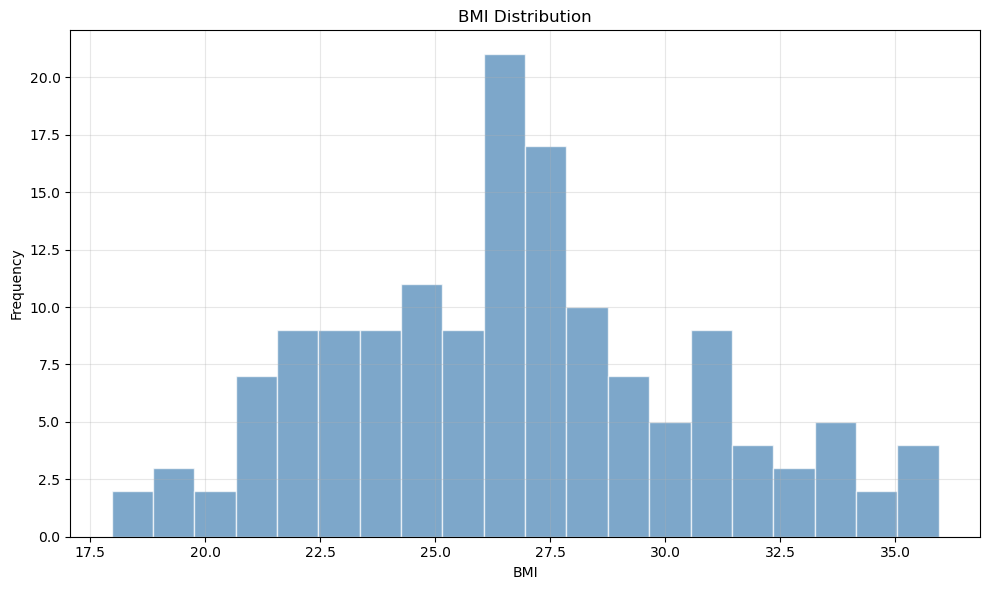

In [25]:
# Create basic histogram of BMI
plt.figure(figsize=(10, 6))
plt.hist(ElderlyPopWA['BMI'], bins=20, alpha=0.7, color='steelblue', edgecolor='white')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2.2.2 Styled Histogram with Custom Settings

Create a styled histogram with custom bin width and colors.

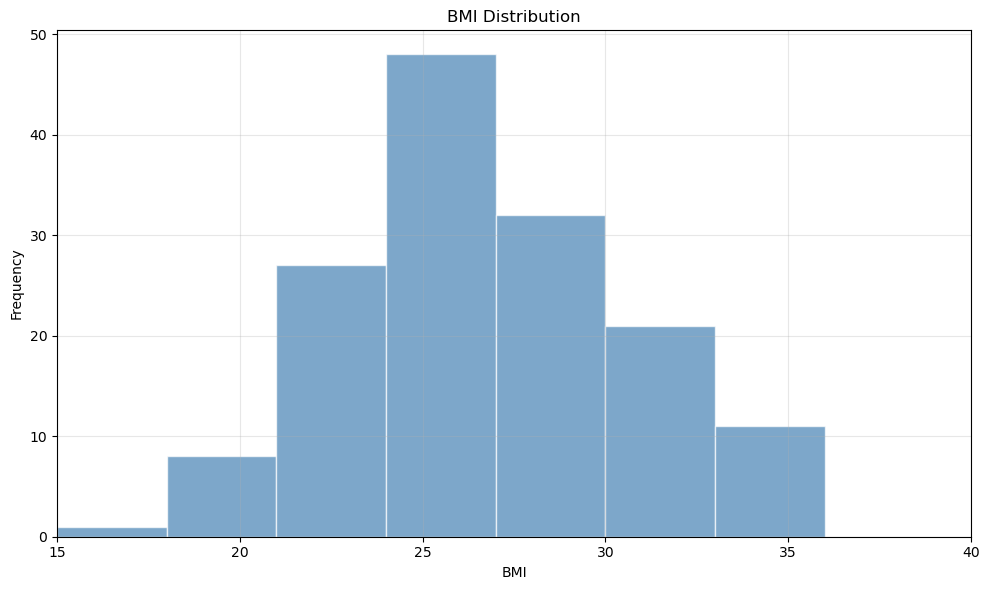

In [26]:
# Create styled histogram with custom settings
plt.figure(figsize=(10, 6))
plt.hist(ElderlyPopWA['BMI'], bins=np.arange(15, 40, 3), 
         color='steelblue', edgecolor='white', alpha=0.7)

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.xlim(15, 40)  # Set x-axis limits
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Exercise: Describe the BMI data in relation to centre, spread and shape. Similarly, plot a histogram for Waist, Hip, Tricep, Arm Girth and Percent Body Fat and describe the them.

### 2.2.3 Create BMI Categories

Categorize BMI values into weight classes.

In [27]:
# Create BMI categories for the elderly participants
max_bmi = ElderlyPopWA['BMI'].max()  # Maximum BMI value within the sample

# Create BMI classification
ElderlyPopWA['BMI_class'] = pd.cut(ElderlyPopWA['BMI'],
                                   bins=[0, 23, 31, max_bmi],
                                   labels=['Underweight', 'Healthy Weight', 'Overweight'])

print("BMI Categories Created:")
print(ElderlyPopWA['BMI_class'].value_counts())
print(f"\nSample data with BMI classes:")
print(ElderlyPopWA.head(10))

BMI Categories Created:
BMI_class
Healthy Weight    100
Underweight        27
Overweight         21
Name: count, dtype: int64

Sample data with BMI classes:
   ParticipantID        Age        BMI       Waist         Hip     Tricep  \
0              1  75.013699  26.370318   89.000000   99.199997  21.799999   
1              2  76.367123  29.467426   99.699997  111.500000  21.299999   
2              3  75.624658  27.485648   88.800003  104.800003  28.799999   
3              4  73.868493  23.426871   82.800003   99.199997  22.799999   
4              5  75.526027  27.578124   88.599998  108.500000  27.799999   
5              6  74.095890  35.938673  106.800003  113.800003  29.000000   
6              7  74.810959  27.443247   83.900002  101.800003  30.000000   
7              8  74.079452  28.180084   90.000000  109.900002  22.200001   
8              9  78.630137  34.187393  100.000000  116.000000  37.799999   
9             10  73.871233  24.062499   85.699997   94.300003  17.200001

### 2.2.4 Histogram with BMI Classification

Create a histogram of body fat percentage colored by BMI classification.

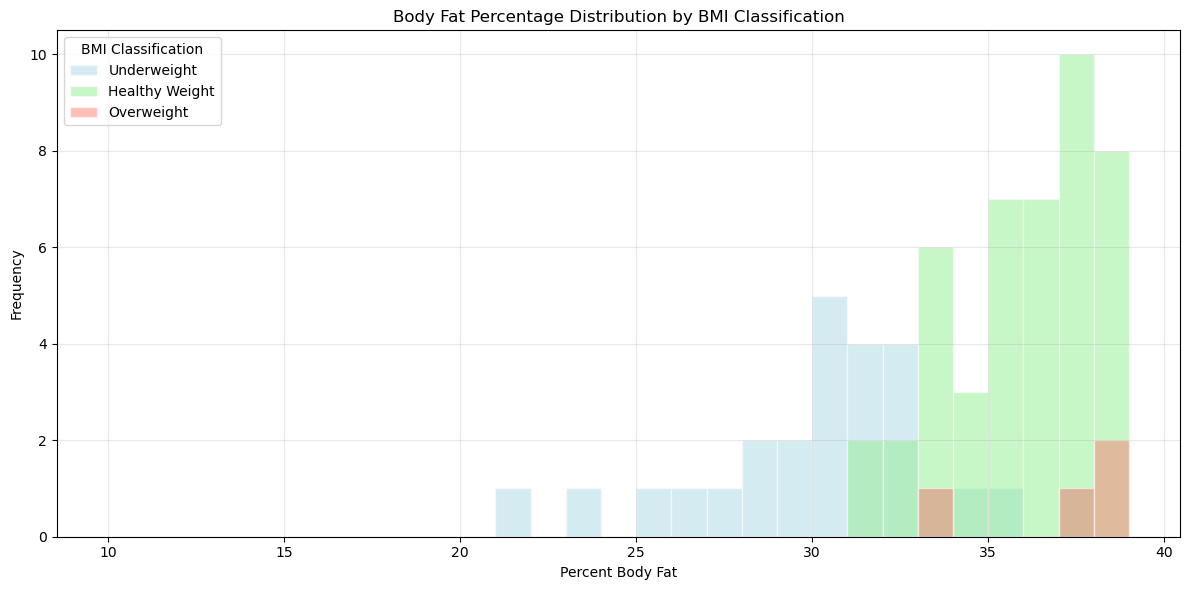

In [29]:
# Create histogram with BMI classification
plt.figure(figsize=(12, 6))

# Create histogram with different colors for each BMI class
colors = ['lightblue', 'lightgreen', 'salmon']
bmi_classes = ['Underweight', 'Healthy Weight', 'Overweight']

for i, bmi_class in enumerate(bmi_classes):
    data = ElderlyPopWA[ElderlyPopWA['BMI_class'] == bmi_class]['Pc_Body_Fat']
    plt.hist(data, bins=np.arange(10, 40, 1), alpha=0.5, 
             color=colors[i], label=bmi_class, edgecolor='white')

plt.title('Body Fat Percentage Distribution by BMI Classification')
plt.xlabel('Percent Body Fat')
plt.ylabel('Frequency')
plt.legend(title='BMI Classification')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2.2.5 Density Histogram

Create a density histogram showing relative frequencies instead of counts.

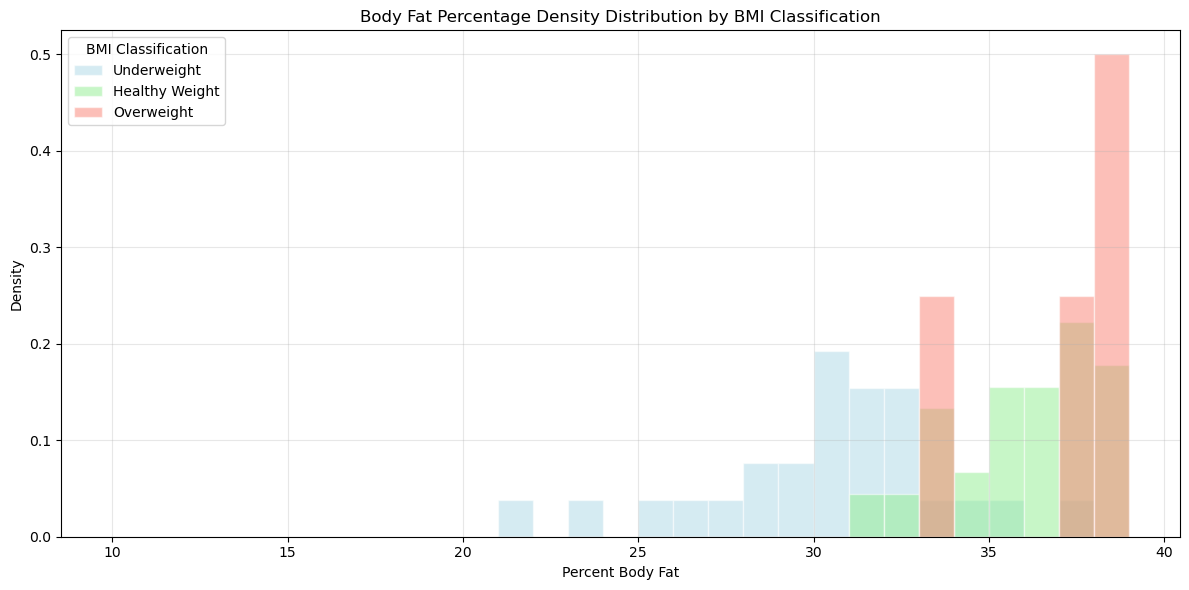

In [30]:
# Create density histogram
plt.figure(figsize=(12, 6))

# Create density histogram with different colors for each BMI class
for i, bmi_class in enumerate(bmi_classes):
    data = ElderlyPopWA[ElderlyPopWA['BMI_class'] == bmi_class]['Pc_Body_Fat']
    plt.hist(data, bins=np.arange(10, 40, 1), alpha=0.5, 
             color=colors[i], label=bmi_class, edgecolor='white', density=True)

plt.title('Body Fat Percentage Density Distribution by BMI Classification')
plt.xlabel('Percent Body Fat')
plt.ylabel('Density')
plt.legend(title='BMI Classification')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Notice how this did not affect the shape of the distribution, but the heights of the distributions are now similar. This is because they have been scaled in such a way that the areas of the bars sum to 1. Note that density is different to relative frequency, which is calculated by dividing each frequency by total number of observations for the corresponding group.

A histogram can be an inadequate visual tool for determining the shape of the distribution as it is heavily influenced by the bin width or the number of bins. A more effective way to viewing distributions is by using density curves.



### 2.2.6 Density Plot

Create density plots for body fat percentage by BMI classification.

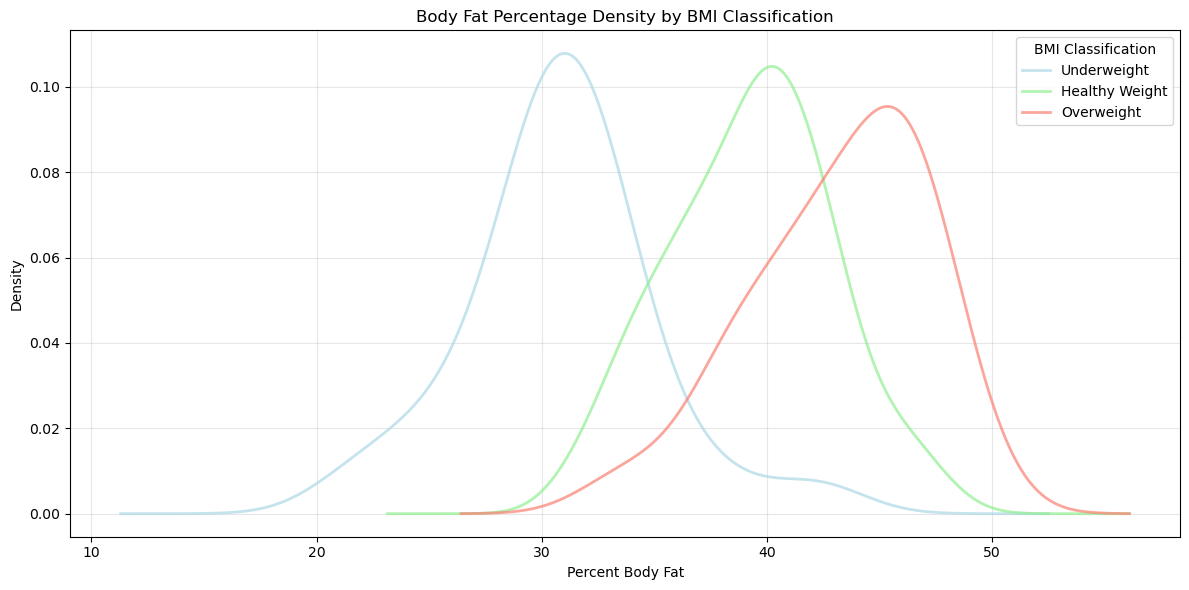

In [31]:
# Create density plots
plt.figure(figsize=(12, 6))

# Create density plots for each BMI class
for i, bmi_class in enumerate(bmi_classes):
    data = ElderlyPopWA[ElderlyPopWA['BMI_class'] == bmi_class]['Pc_Body_Fat']
    data.plot.kde(color=colors[i], linewidth=2, alpha=0.7, label=bmi_class)

plt.title('Body Fat Percentage Density by BMI Classification')
plt.xlabel('Percent Body Fat')
plt.ylabel('Density')
plt.legend(title='BMI Classification')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2.2.7 Combined Histogram and Density Plot

Create a combined plot showing both histogram and density curves.

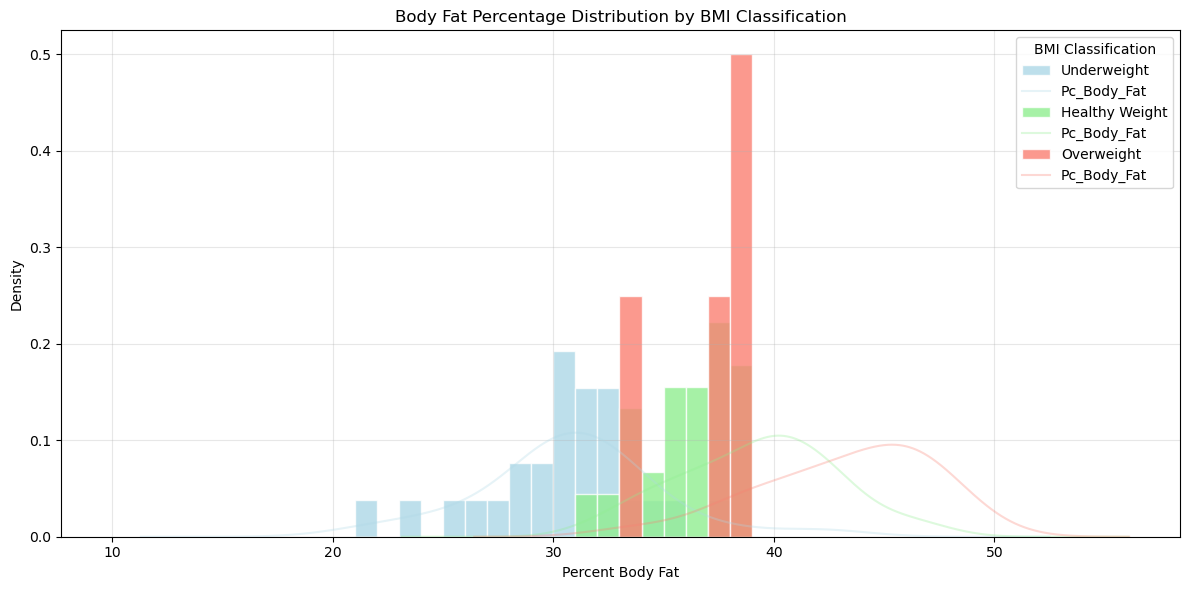

In [32]:
# Create combined histogram and density plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create histogram with density overlay
for i, bmi_class in enumerate(bmi_classes):
    data = ElderlyPopWA[ElderlyPopWA['BMI_class'] == bmi_class]['Pc_Body_Fat']
    
    # Histogram
    ax.hist(data, bins=np.arange(10, 40, 1), alpha=0.8, 
            color=colors[i], label=bmi_class, edgecolor='white', density=True)
    
    # Density curve
    data.plot.kde(color=colors[i], linewidth=1.5, alpha=0.3, ax=ax)

plt.title('Body Fat Percentage Distribution by BMI Classification')
plt.xlabel('Percent Body Fat')
plt.ylabel('Density')
plt.legend(title='BMI Classification')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2.3 Boxplots: Iris Dataset and Advanced Visualizations

Explore the iris dataset with boxplots, grouped boxplots, and violin plots.

A boxplot (or box and whiskers plot) is a visualisation of the 5-number summary. A great feature of a boxplot in R (and other software) is that outliers are flagged. By default, a point 𝑥 is an outlier if it falls outside of the range given by 𝑄1 − 1.5 × 𝐼𝑄𝑅 ≤ 𝑥 ≤ 𝑄3 + 1.5 × 𝐼𝑄𝑅. The value of 1.5 can be altered to say, 3, by specifying the argument oulier.size in the geom_boxplot(.) command.

We will use the iris data for this demonstration. 


In [37]:
# Load iris dataset
from sklearn.datasets import load_iris
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['target'] = iris_data.target

# Map target numbers to species names
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris['Species'] = iris['target'].map(species_map)

print("Iris Dataset (first 10 rows):")
print(iris.head(10))
print(f"\nDataset shape: {iris.shape}")
print(f"\nSpecies distribution:")
print(iris['Species'].value_counts())

Iris Dataset (first 10 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target Species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  


### 2.3.1 Boxplot of Sepal Length

Create a boxplot of sepal length for all species.

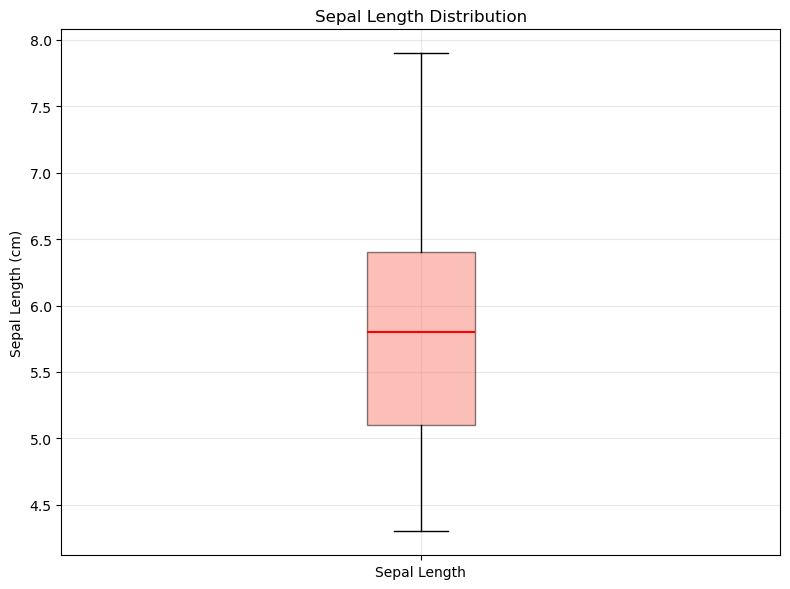

In [38]:
plt.figure(figsize=(8, 6))
plt.boxplot(iris['sepal length (cm)'],
            patch_artist=True,
            boxprops=dict(facecolor='salmon', alpha=0.5),
            medianprops=dict(color='red', linewidth=1.5))
plt.title('Sepal Length Distribution')
plt.ylabel('Sepal Length (cm)')
plt.xticks([1], ['Sepal Length'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2.3.2 Grouped Boxplot by Species

Create a boxplot of sepal length grouped by species.

/var/folders/6t/sm9t_l250ng6n6pw4318bjlm0000gn/T/ipykernel_32212/2879241921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x='Species', y='sepal length (cm)',


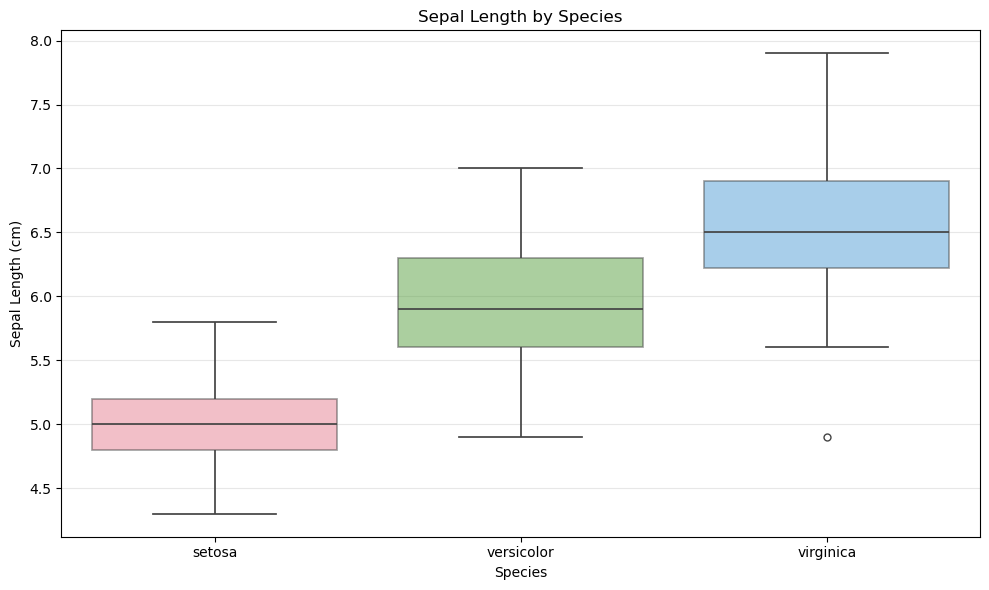

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x='Species', y='sepal length (cm)',
            palette='husl', fliersize=5, linewidth=1.25,
            boxprops=dict(alpha=0.5))
plt.title('Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 2.3.3 Grouped Boxplot with Outlier Customization

Boxplot with custom outlier size and shape.

/var/folders/6t/sm9t_l250ng6n6pw4318bjlm0000gn/T/ipykernel_32212/1496470300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x='Species', y='sepal length (cm)',


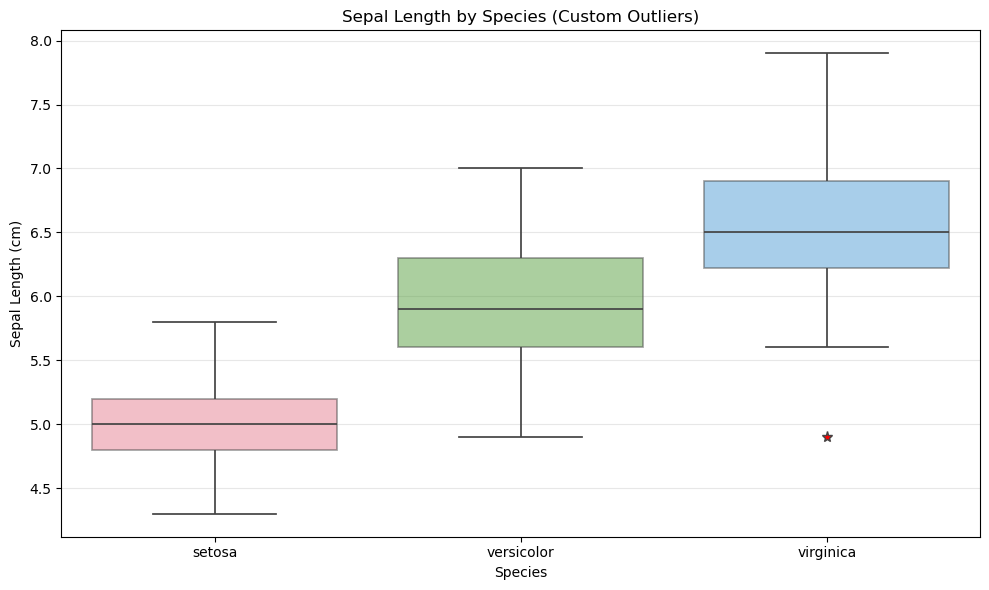

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x='Species', y='sepal length (cm)',
            palette='husl', fliersize=5, linewidth=1.25,
            boxprops=dict(alpha=0.5),
            flierprops=dict(marker='*', markersize=8, markerfacecolor='red'))
plt.title('Sepal Length by Species (Custom Outliers)')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 2.3.4 Boxplot with Jittered Data Points

Overlay jittered data points on the boxplot. Boxplots can be dangerous in the sense that the exact distribution and the density of the observations are hidden behind the boxes. For example, the length of the whiskers could be due to one or two observations, and we would not know any better. To enhance the visualisation of boxplots, we can include the actual observation points, but in a jittery manner. Notice in the code below that we need to specify Species along the x-axis in aes(.) within the stripplot(.) function so that the jitter points can be correctly mapped to the boxplots.

/var/folders/6t/sm9t_l250ng6n6pw4318bjlm0000gn/T/ipykernel_32212/1746829303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x='Species', y='sepal length (cm)',


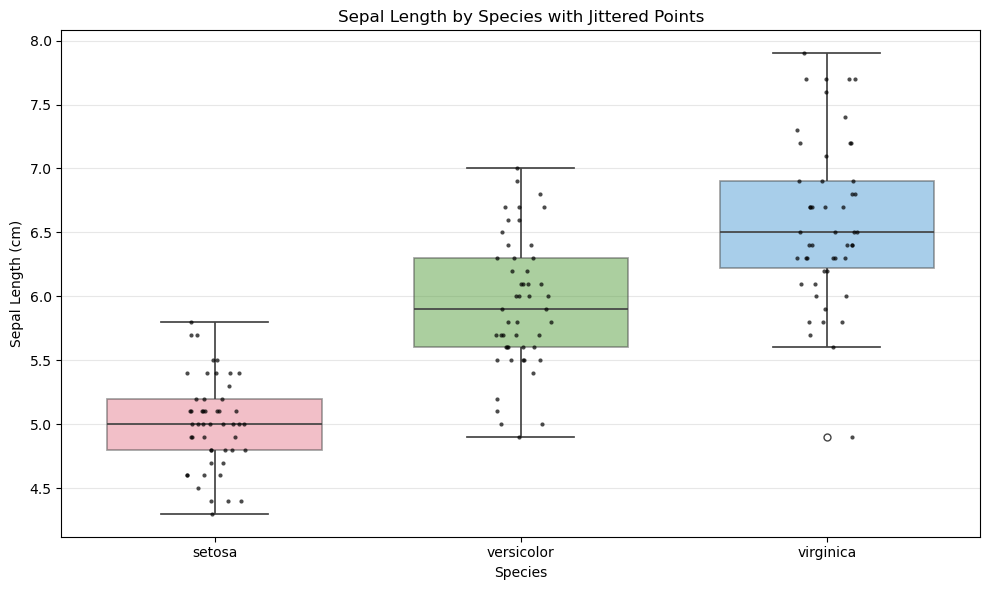

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x='Species', y='sepal length (cm)',
            palette='husl', width=0.7, linewidth=1.25, fliersize=5, boxprops=dict(alpha=0.5))
sns.stripplot(data=iris, x='Species', y='sepal length (cm)',
              color='black', size=3, jitter=0.1, alpha=0.7)
plt.title('Sepal Length by Species with Jittered Points')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 2.3.5 Boxplot and Violin Plot Combined

Another way the enhance a boxplot is by including a violin plot. A violin plot is a rotated density plot on each side. Combine boxplot and violin plot for sepal length by species.

/var/folders/6t/sm9t_l250ng6n6pw4318bjlm0000gn/T/ipykernel_32212/3552182360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=iris, x='Species', y='sepal length (cm)',
/var/folders/6t/sm9t_l250ng6n6pw4318bjlm0000gn/T/ipykernel_32212/3552182360.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x='Species', y='sepal length (cm)',


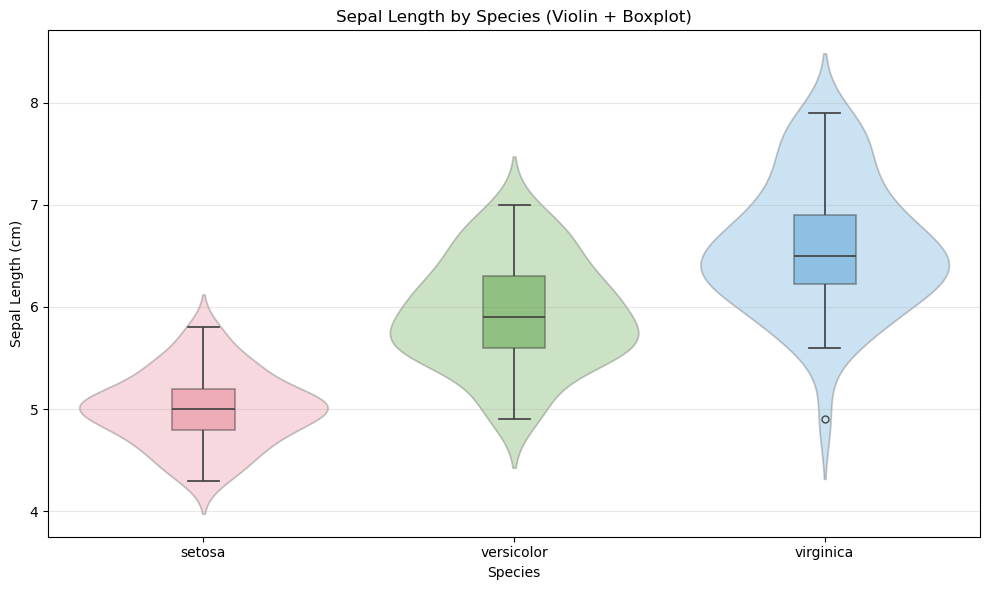

In [42]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=iris, x='Species', y='sepal length (cm)',
               palette='husl', alpha=0.3, inner=None)
sns.boxplot(data=iris, x='Species', y='sepal length (cm)',
            palette='husl', width=0.2, linewidth=1.25, fliersize=5, boxprops=dict(alpha=0.5))
plt.title('Sepal Length by Species (Violin + Boxplot)')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 2.4 Scatter Plot: Years of Experience vs Salary

A scatter plot utilises Cartesian coordinates to display the values of two (or three) continuous variables. Scatter plots are a great way to visualise the relationship between the variables. Quite often with scatter plots, we able to ascertain the strength and the nature (e.g. linear or non-linear) of the relationships, and even outliers. This is extremely helpful in deciding the appropriate measures and models to use to describe the relationship. Load and plot the Salary Data.

Next, we will use a scatter plot to illustrate the relationship between the two variable. Note that the predictor/feature is typically plotted along the x-axis and the outcome/response along the y-axis. In this instance, it makes sense that years of experience is a predictor of salary, and not the other way around.

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


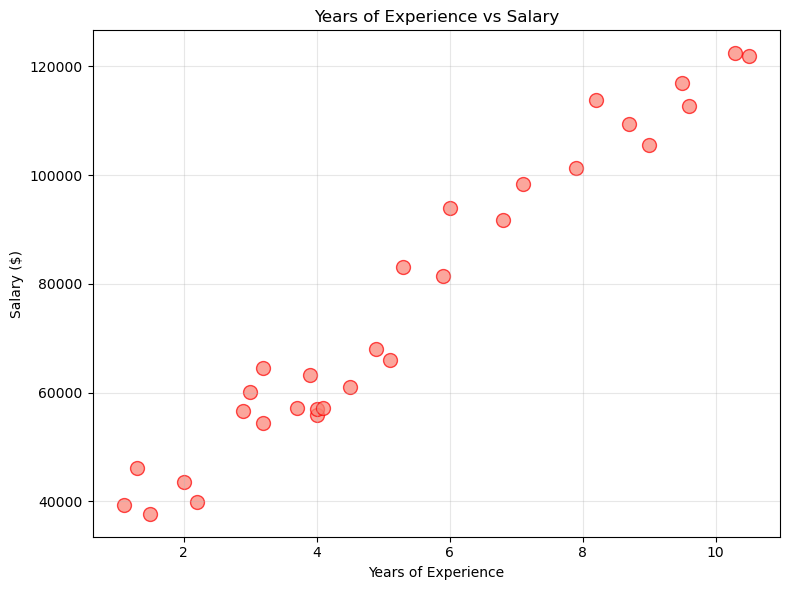

In [43]:
# Load Salary Data
url = "https://raw.githubusercontent.com/asim-cv/MAT6206/refs/heads/main/Datasets/Salary_Data.csv"
salary_df = pd.read_csv(url)

print(salary_df.head())

plt.figure(figsize=(8, 6))
plt.scatter(salary_df['YearsExperience'], salary_df['Salary'],
            color='salmon', edgecolor='red', alpha=0.7, s=100)
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2.4.1 Air Quality Data Analysis

Load and analyze air quality data with scatter plots and bubble charts.

In [44]:
# Load air quality data
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')

# Create simulated air quality data (since the original dataset might not be available)
np.random.seed(42)
n_samples = 150

# Generate simulated air quality data
solar_radiation = np.random.uniform(50, 300, n_samples)
temperature = np.random.uniform(60, 90, n_samples)
ozone = 50 + 0.3 * solar_radiation + 0.5 * temperature + np.random.normal(0, 10, n_samples)
ozone = np.clip(ozone, 0, 150)  # Clip to realistic ozone levels

# Create DataFrame
aq = pd.DataFrame({
    'Solar.R': solar_radiation,
    'Ozone': ozone,
    'Temp': temperature
})

print("Air Quality Data (first 10 rows):")
print(aq.head(10))
print(f"\nDataset shape: {aq.shape}")
print(f"\nData summary:")
print(aq.describe())

Air Quality Data (first 10 rows):
      Solar.R       Ozone       Temp
0  143.635030  137.170216  87.247977
1  287.678577  150.000000  67.186857
2  232.998485  150.000000  64.346846
3  199.664621  150.000000  74.683583
4   89.004660  101.234729  89.569514
5   88.998630  112.194961  67.261658
6   64.520903  102.820439  80.164066
7  266.544036  150.000000  82.848588
8  200.278753  135.722982  67.129126
9  227.018144  150.000000  81.846490

Dataset shape: (150, 3)

Data summary:
          Solar.R       Ozone        Temp
count  150.000000  150.000000  150.000000
mean   168.221784  132.682361   75.525662
std     74.132693   17.512564    8.742354
min     51.380529   96.386748   60.151848
25%    103.695321  116.956676   67.424329
50%    162.027810  138.796327   76.680031
75%    237.415460  150.000000   82.735127
max    296.721734  150.000000   89.701616


### 2.4.2 Bubble Chart: Solar Radiation vs Ozone

Create a scatter plot with point size representing temperature.

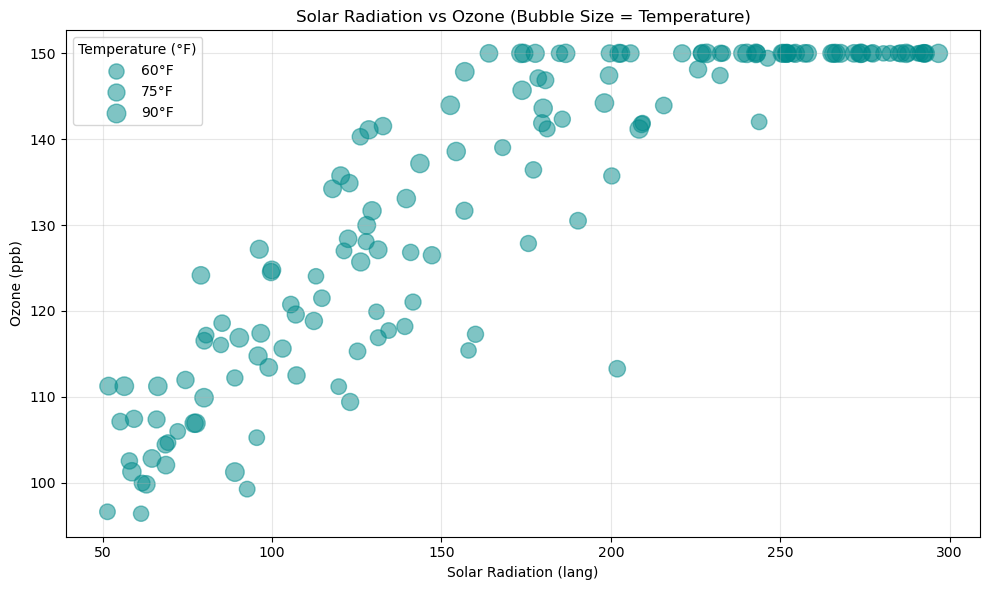

In [45]:
# Create bubble chart
plt.figure(figsize=(10, 6))
scatter = plt.scatter(aq['Solar.R'], aq['Ozone'], 
                      s=aq['Temp']*2,  # Size based on temperature
                      c='darkcyan', alpha=0.5)

plt.title('Solar Radiation vs Ozone (Bubble Size = Temperature)')
plt.xlabel('Solar Radiation (lang)')
plt.ylabel('Ozone (ppb)')

# Add legend for bubble sizes
legend_elements = [plt.scatter([], [], s=60*2, c='darkcyan', alpha=0.5, label='60°F'),
                   plt.scatter([], [], s=75*2, c='darkcyan', alpha=0.5, label='75°F'),
                   plt.scatter([], [], s=90*2, c='darkcyan', alpha=0.5, label='90°F')]
plt.legend(handles=legend_elements, title='Temperature (°F)', loc='upper left')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2.5 Line Plot and Data Breaches Time Series

A line chart displays the progression of one or more numeric variables. It’s similar to a scatter plot, except that the points are connected by line segments, and the measurement points along the x-axis are (typically) ordered. For example, time-series data are best presented with a line chart, where time is plotted along the x-axis.
Let us create some fictitious data relating to the number of data breaches across all businesses in Australia in the past 10 years.
Generate and analyze time series data for data breaches.

In [46]:
# Set random seed for reproducibility
np.random.seed(12)

# Generate years and Australia data
Year = list(range(2010, 2020))
Australia = np.random.choice(range(50, 201), size=10, replace=False)
Australia = np.sort(Australia)  # Sort in ascending order

# Create DataFrame
df_breaches = pd.DataFrame({
    'Year': Year,
    'Australia': Australia
})

print("Data Breaches - Australia (first 10 rows):")
print(df_breaches)
print(f"\nTotal rows: {len(df_breaches)}")

Data Breaches - Australia (first 10 rows):
   Year  Australia
0  2010         73
1  2011         88
2  2012         89
3  2013         90
4  2014        133
5  2015        149
6  2016        182
7  2017        186
8  2018        194
9  2019        197

Total rows: 10


### 2.5.1 Basic Line Plot

Create a basic line plot showing data breaches over time.

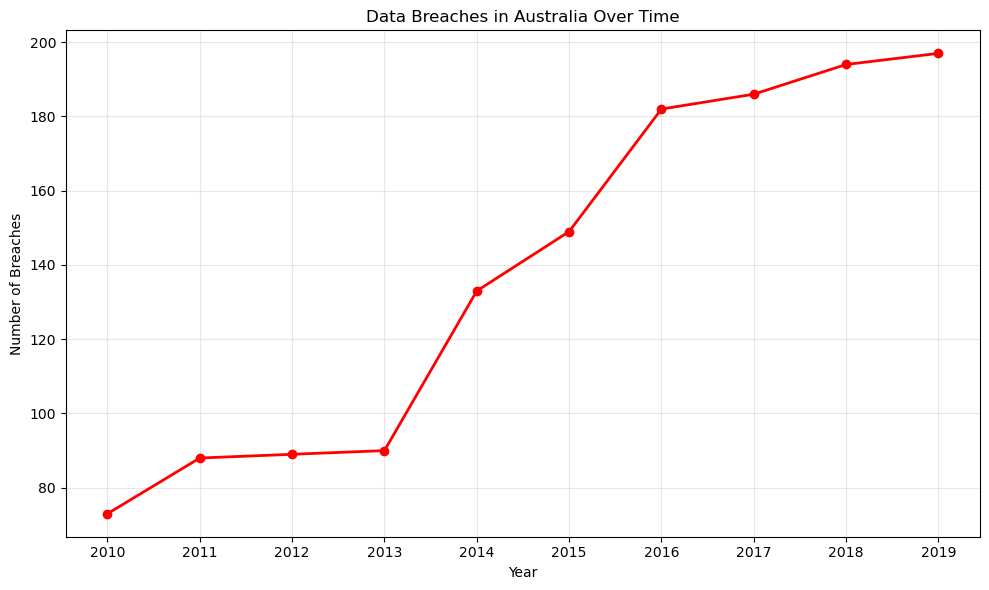

In [47]:
# Create basic line plot
plt.figure(figsize=(10, 6))
plt.plot(df_breaches['Year'], df_breaches['Australia'], 
         color='red', linewidth=2, marker='o')

plt.title('Data Breaches in Australia Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.grid(True, alpha=0.3)
plt.xticks(df_breaches['Year'])
plt.tight_layout()
plt.show()

### 2.5.2 Line Plot with Points and Annotations

Create a line plot with points and value annotations.

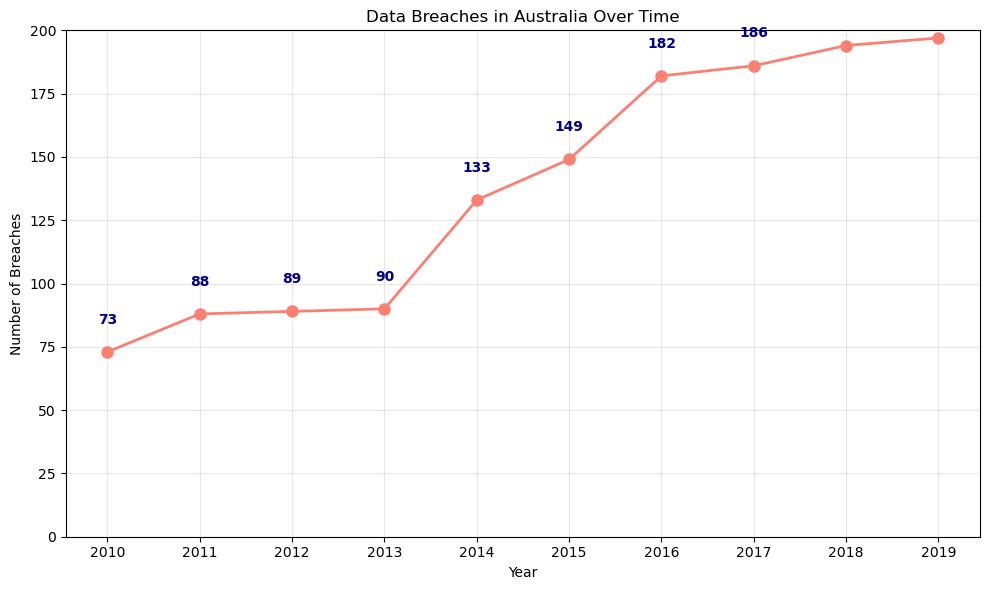

In [48]:
# Create line plot with points and annotations
plt.figure(figsize=(10, 6))
plt.plot(df_breaches['Year'], df_breaches['Australia'], 
         color='salmon', linewidth=2, marker='o', markersize=8)

# Add point annotations
for i, row in df_breaches.iterrows():
    plt.annotate(str(row['Australia']), 
                 xy=(row['Year'], row['Australia'] + 10),
                 ha='center', va='bottom', color='darkblue', fontweight='bold')

plt.title('Data Breaches in Australia Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.ylim(0, 200)
plt.grid(True, alpha=0.3)
plt.xticks(df_breaches['Year'])
plt.tight_layout()
plt.show()

### 2.5.3 Add Canada Data

Generate additional data for Canada comparison.

In [49]:
# Set random seed for Canada data
np.random.seed(20)

# Generate Canada data
Canada = np.random.choice(range(20, 151), size=10, replace=False)
Canada = np.sort(Canada)  # Sort in ascending order

# Add Canada data to DataFrame
df_breaches['Canada'] = Canada

print("Data Breaches - Australia and Canada:")
print(df_breaches)
print(f"\nSummary statistics:")
print(df_breaches[['Australia', 'Canada']].describe())

Data Breaches - Australia and Canada:
   Year  Australia  Canada
0  2010         73      20
1  2011         88      21
2  2012         89      66
3  2013         90      85
4  2014        133      90
5  2015        149      98
6  2016        182     104
7  2017        186     120
8  2018        194     132
9  2019        197     141

Summary statistics:
        Australia     Canada
count   10.000000   10.00000
mean   138.100000   87.70000
std     49.925389   41.81188
min     73.000000   20.00000
25%     89.250000   70.75000
50%    141.000000   94.00000
75%    185.000000  116.00000
max    197.000000  141.00000


### 2.5.4 Multi-Line Plot

Create a line plot comparing Australia and Canada data breaches.

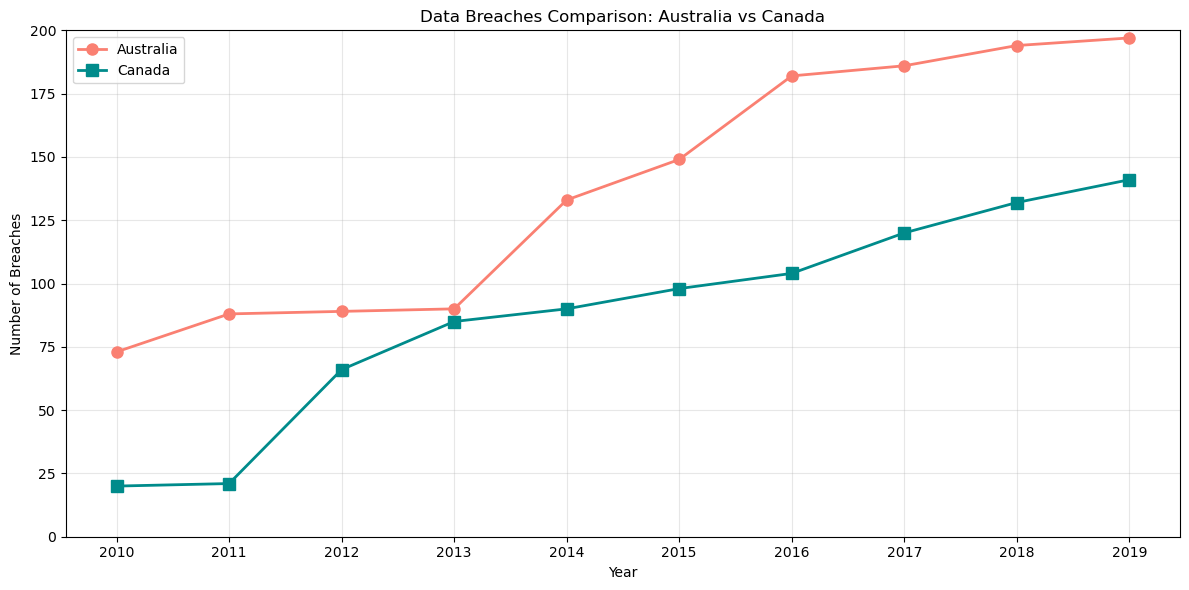

In [50]:
# Create multi-line plot
plt.figure(figsize=(12, 6))

# Plot Australia data
plt.plot(df_breaches['Year'], df_breaches['Australia'], 
         color='salmon', linewidth=2, marker='o', markersize=8, label='Australia')

# Plot Canada data
plt.plot(df_breaches['Year'], df_breaches['Canada'], 
         color='darkcyan', linewidth=2, marker='s', markersize=8, label='Canada')

plt.title('Data Breaches Comparison: Australia vs Canada')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.ylim(0, 200)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(df_breaches['Year'])
plt.tight_layout()
plt.show()

### 2.5.5 Area Plot with Multiple Countries

Create an area plot with filled regions for both countries.

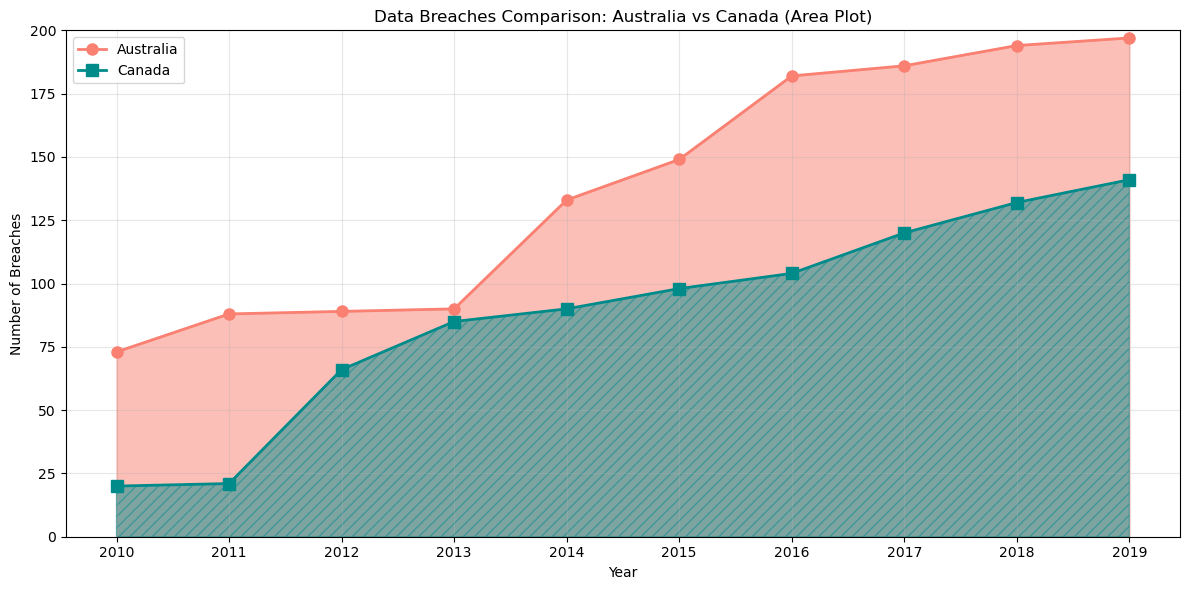

In [51]:
# Create area plot with multiple countries
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Australia data with area fill
ax.plot(df_breaches['Year'], df_breaches['Australia'], 
        color='salmon', linewidth=2, marker='o', markersize=8, label='Australia')
ax.fill_between(df_breaches['Year'], df_breaches['Australia'], 
                alpha=0.5, color='salmon')

# Plot Canada data with area fill
ax.plot(df_breaches['Year'], df_breaches['Canada'], 
        color='darkcyan', linewidth=2, marker='s', markersize=8, label='Canada')
ax.fill_between(df_breaches['Year'], df_breaches['Canada'], 
                alpha=0.5, color='darkcyan', hatch='///')

plt.title('Data Breaches Comparison: Australia vs Canada (Area Plot)')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.ylim(0, 200)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(df_breaches['Year'])
plt.tight_layout()
plt.show()

## 2.6 Faceted Plots with Different Layouts

Create various faceted plot layouts using the fish data.

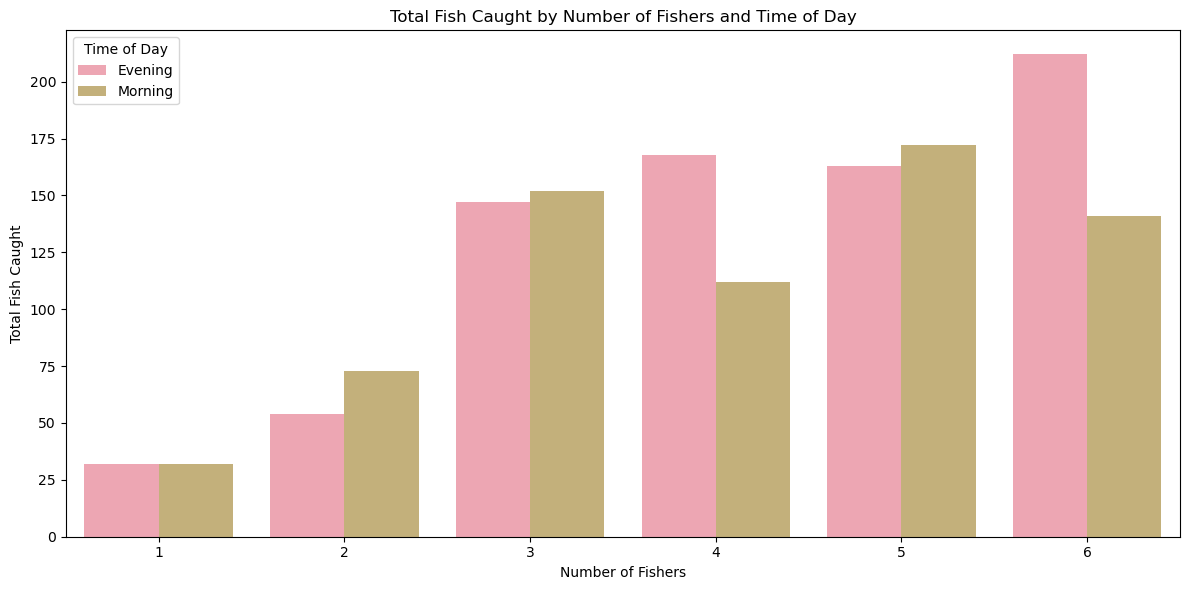

In [53]:
# Create faceted plots with different layouts
# First, let's recreate the grouped bar plot for faceting
plt.figure(figsize=(12, 6))
sns.barplot(data=tot_fishers_tod, x='num_fisher', y='fish_caught', hue='ToD', alpha=0.7)
plt.title('Total Fish Caught by Number of Fishers and Time of Day')
plt.xlabel('Number of Fishers')
plt.ylabel('Total Fish Caught')
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

### 2.6.1 Faceted Plot - Row Layout

Create a faceted plot using wrap layout (similar to facet_wrap).

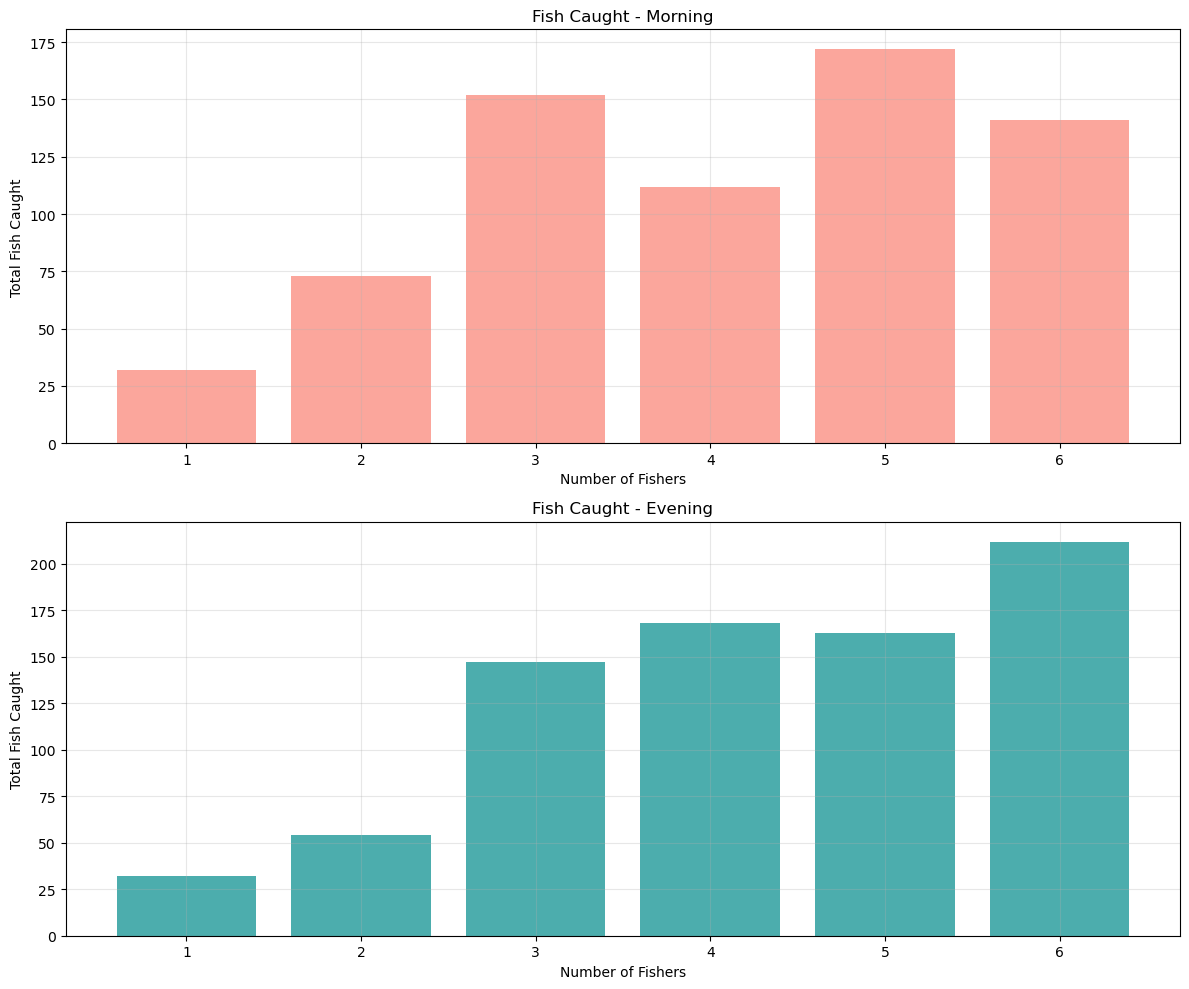

In [58]:
# Create faceted plot with 2 rows layout
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Morning data
morning_data = tot_fishers_tod[tot_fishers_tod['ToD'] == 'Morning']
axes[0].bar(morning_data['num_fisher'], morning_data['fish_caught'], 
             color='salmon', alpha=0.7)
axes[0].set_title('Fish Caught - Morning')
axes[0].set_xlabel('Number of Fishers')
axes[0].set_ylabel('Total Fish Caught')
axes[0].grid(True, alpha=0.3)

# Evening data
evening_data = tot_fishers_tod[tot_fishers_tod['ToD'] == 'Evening']
axes[1].bar(evening_data['num_fisher'], evening_data['fish_caught'], 
             color='darkcyan', alpha=0.7)
axes[1].set_title('Fish Caught - Evening')
axes[1].set_xlabel('Number of Fishers')
axes[1].set_ylabel('Total Fish Caught')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.6.2 Faceted Plot - Column Layout

Create a faceted plot with column layout (similar to facet_grid with columns).

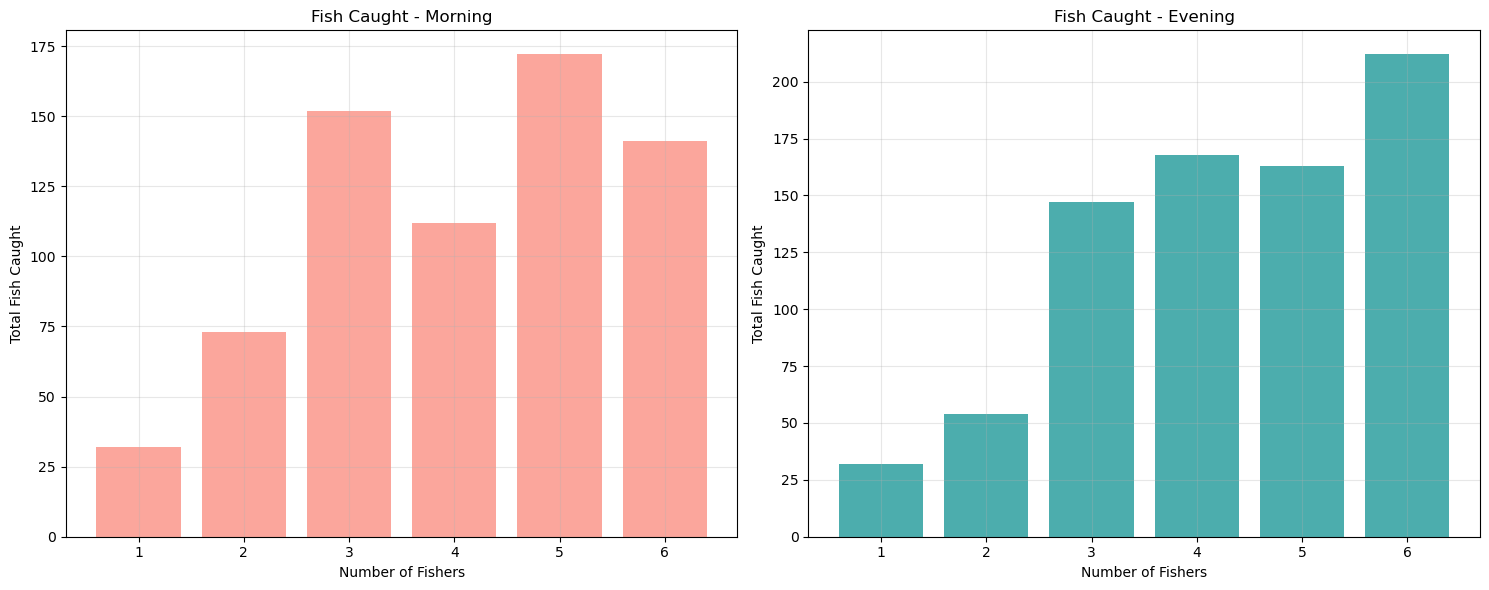

In [59]:
# Create faceted plot with column layout
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Morning data
morning_data = tot_fishers_tod[tot_fishers_tod['ToD'] == 'Morning']
axes[0].bar(morning_data['num_fisher'], morning_data['fish_caught'], 
             color='salmon', alpha=0.7)
axes[0].set_title('Fish Caught - Morning')
axes[0].set_xlabel('Number of Fishers')
axes[0].set_ylabel('Total Fish Caught')
axes[0].grid(True, alpha=0.3)

# Evening data
evening_data = tot_fishers_tod[tot_fishers_tod['ToD'] == 'Evening']
axes[1].bar(evening_data['num_fisher'], evening_data['fish_caught'], 
             color='darkcyan', alpha=0.7)
axes[1].set_title('Fish Caught - Evening')
axes[1].set_xlabel('Number of Fishers')
axes[1].set_ylabel('Total Fish Caught')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.6.3 Multi-Plot Arrangement

Create a multi-plot arrangement with different visualizations.

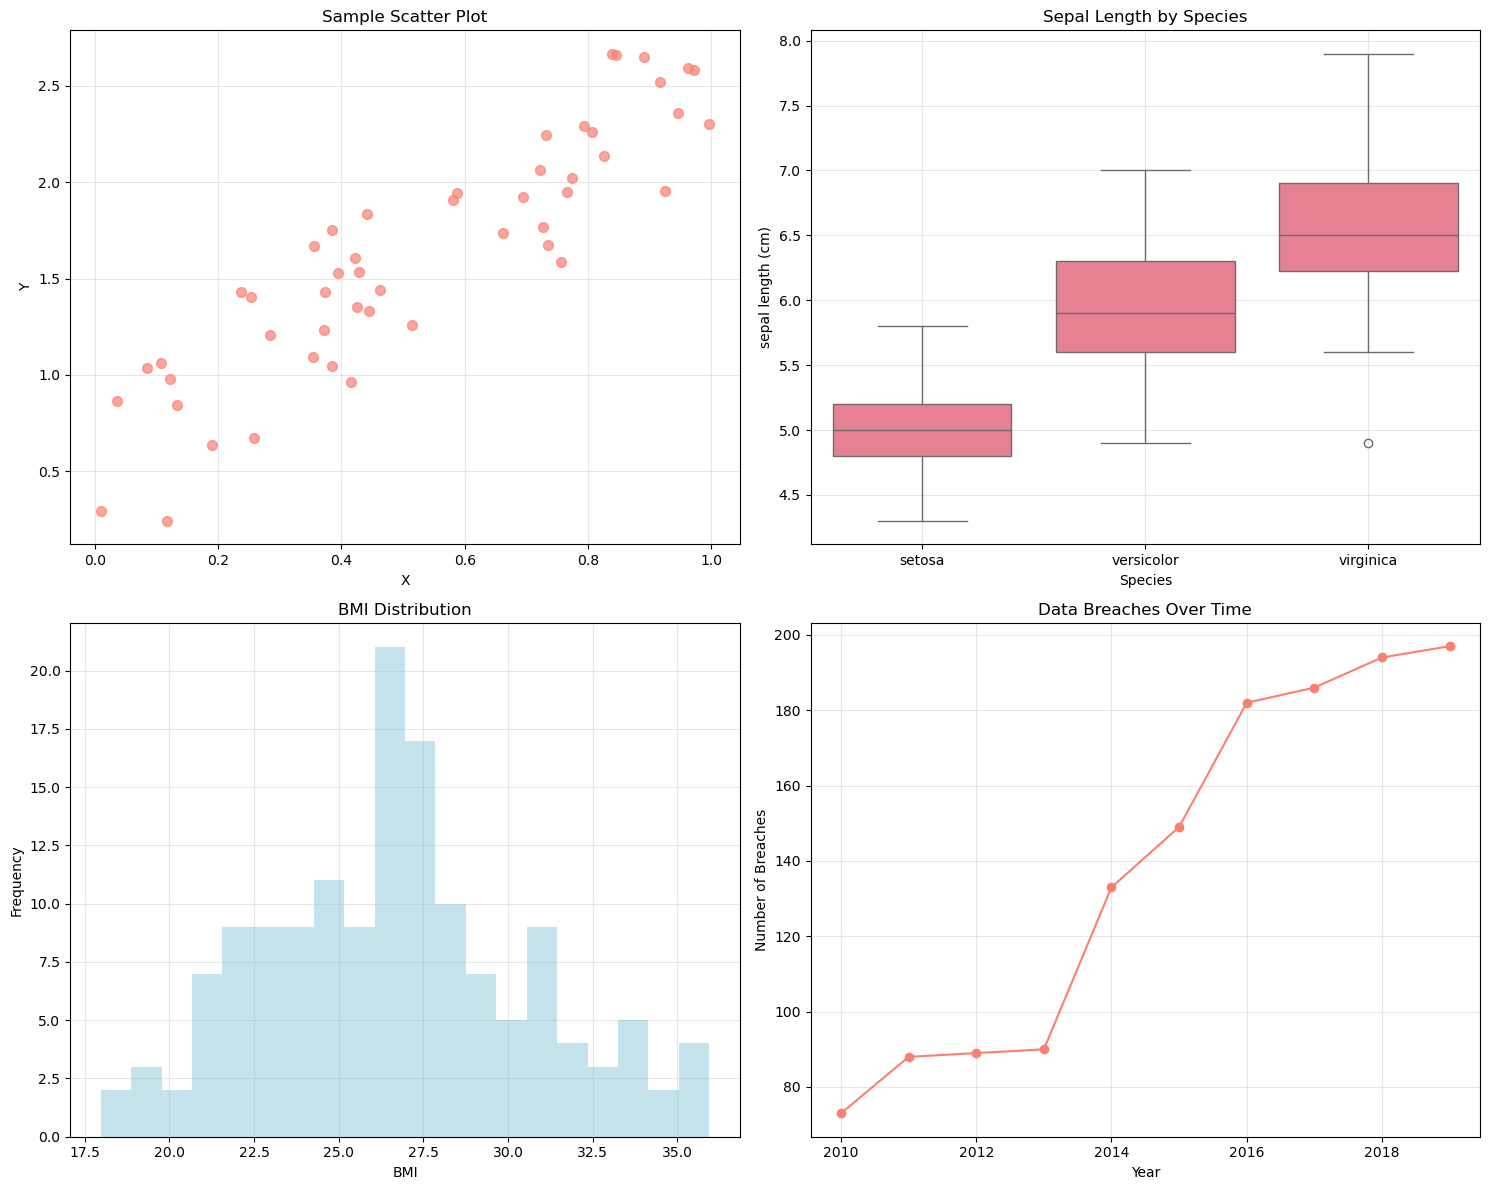

In [60]:
# Create multi-plot arrangement
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Salary vs Experience (if salary data exists)
try:
    salary_df = pd.read_csv('Salary_Data-1.csv')
    axes[0, 0].scatter(salary_df['YearsExperience'], salary_df['Salary'],
                       color='salmon', alpha=0.7, s=50)
    axes[0, 0].set_title('Salary vs Experience')
    axes[0, 0].set_xlabel('Years of Experience')
    axes[0, 0].set_ylabel('Salary ($)')
    axes[0, 0].grid(True, alpha=0.3)
except:
    # If salary data doesn't exist, create a sample plot
    x = np.random.rand(50)
    y = x * 2 + np.random.rand(50)
    axes[0, 0].scatter(x, y, color='salmon', alpha=0.7, s=50)
    axes[0, 0].set_title('Sample Scatter Plot')
    axes[0, 0].set_xlabel('X')
    axes[0, 0].set_ylabel('Y')
    axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Iris boxplot
if 'iris' in locals():
    sns.boxplot(data=iris, x='Species', y='sepal length (cm)', ax=axes[0, 1])
    axes[0, 1].set_title('Sepal Length by Species')
    axes[0, 1].grid(True, alpha=0.3)
else:
    # Create sample boxplot
    data = [np.random.normal(0, 1, 100) for _ in range(3)]
    axes[0, 1].boxplot(data, labels=['A', 'B', 'C'])
    axes[0, 1].set_title('Sample Boxplot')
    axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Fish data histogram
if 'ElderlyPopWA' in locals():
    axes[1, 0].hist(ElderlyPopWA['BMI'], bins=20, alpha=0.7, color='lightblue')
    axes[1, 0].set_title('BMI Distribution')
    axes[1, 0].set_xlabel('BMI')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].grid(True, alpha=0.3)
else:
    # Create sample histogram
    data = np.random.normal(0, 1, 1000)
    axes[1, 0].hist(data, bins=30, alpha=0.7, color='lightblue')
    axes[1, 0].set_title('Sample Histogram')
    axes[1, 0].set_xlabel('Value')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Line plot
if 'df_breaches' in locals():
    axes[1, 1].plot(df_breaches['Year'], df_breaches['Australia'], 
                     color='salmon', marker='o')
    axes[1, 1].set_title('Data Breaches Over Time')
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Number of Breaches')
    axes[1, 1].grid(True, alpha=0.3)
else:
    # Create sample line plot
    x = np.arange(10)
    y = np.random.rand(10)
    axes[1, 1].plot(x, y, color='salmon', marker='o')
    axes[1, 1].set_title('Sample Line Plot')
    axes[1, 1].set_xlabel('X')
    axes[1, 1].set_ylabel('Y')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.6.4 Complex Multi-Plot Arrangement

Create a more complex multi-plot arrangement with nested layouts.

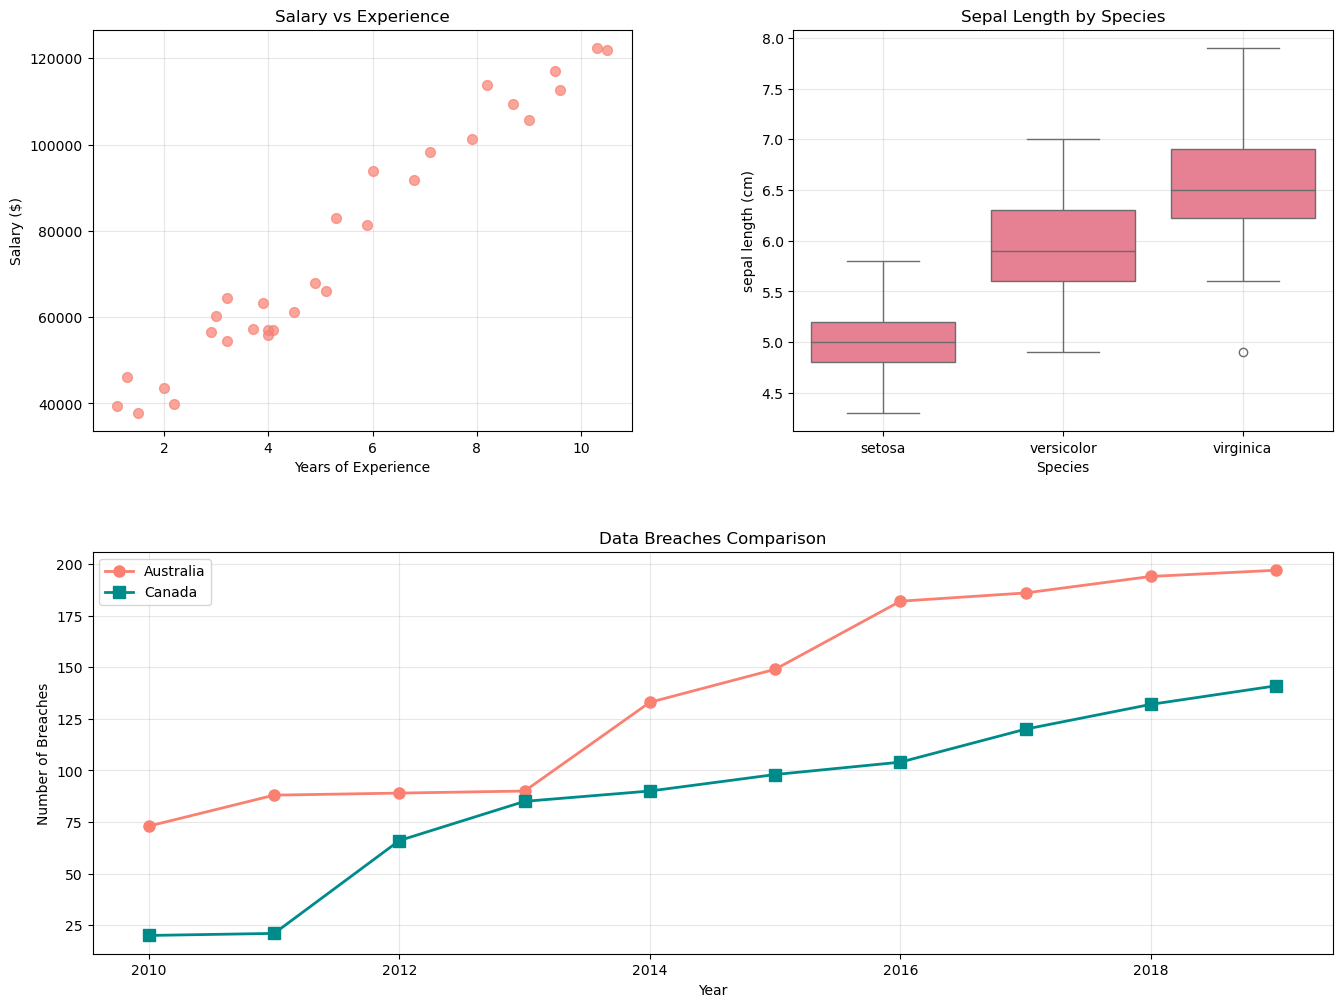

In [61]:
# Create complex multi-plot arrangement
fig = plt.figure(figsize=(16, 12))

# Create a 2x2 grid
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Top row: Two plots side by side
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Bottom row: One plot spanning both columns
ax3 = fig.add_subplot(gs[1, :])

# Plot 1: Scatter plot
if 'salary_df' in locals():
    ax1.scatter(salary_df['YearsExperience'], salary_df['Salary'],
               color='salmon', alpha=0.7, s=50)
    ax1.set_title('Salary vs Experience')
    ax1.set_xlabel('Years of Experience')
    ax1.set_ylabel('Salary ($)')
else:
    x = np.random.rand(50)
    y = x * 2 + np.random.rand(50)
    ax1.scatter(x, y, color='salmon', alpha=0.7, s=50)
    ax1.set_title('Sample Scatter Plot')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
ax1.grid(True, alpha=0.3)

# Plot 2: Boxplot
if 'iris' in locals():
    sns.boxplot(data=iris, x='Species', y='sepal length (cm)', ax=ax2)
    ax2.set_title('Sepal Length by Species')
else:
    data = [np.random.normal(0, 1, 100) for _ in range(3)]
    ax2.boxplot(data, labels=['A', 'B', 'C'])
    ax2.set_title('Sample Boxplot')
ax2.grid(True, alpha=0.3)

# Plot 3: Line plot (spans both columns)
if 'df_breaches' in locals():
    ax3.plot(df_breaches['Year'], df_breaches['Australia'], 
             color='salmon', marker='o', linewidth=2, markersize=8, label='Australia')
    if 'Canada' in df_breaches.columns:
        ax3.plot(df_breaches['Year'], df_breaches['Canada'], 
                 color='darkcyan', marker='s', linewidth=2, markersize=8, label='Canada')
    ax3.set_title('Data Breaches Comparison')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Number of Breaches')
    ax3.legend()
else:
    x = np.arange(10)
    y1 = np.random.rand(10)
    y2 = np.random.rand(10)
    ax3.plot(x, y1, color='salmon', marker='o', linewidth=2, markersize=8, label='Series A')
    ax3.plot(x, y2, color='darkcyan', marker='s', linewidth=2, markersize=8, label='Series B')
    ax3.set_title('Sample Multi-Line Plot')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2.7 Export Plots to Files

Save plots to files (equivalent to ggexport functionality).

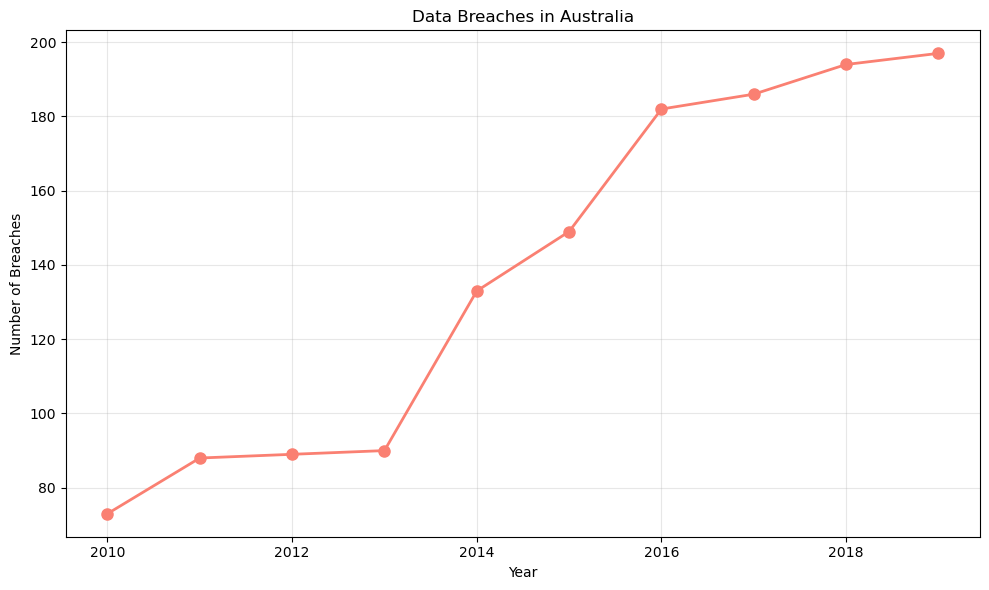

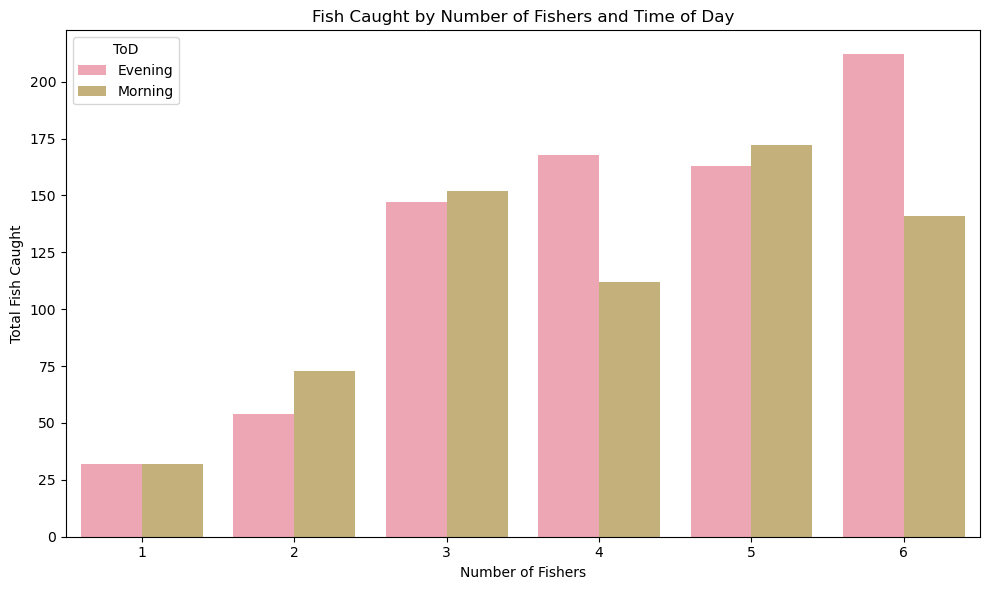

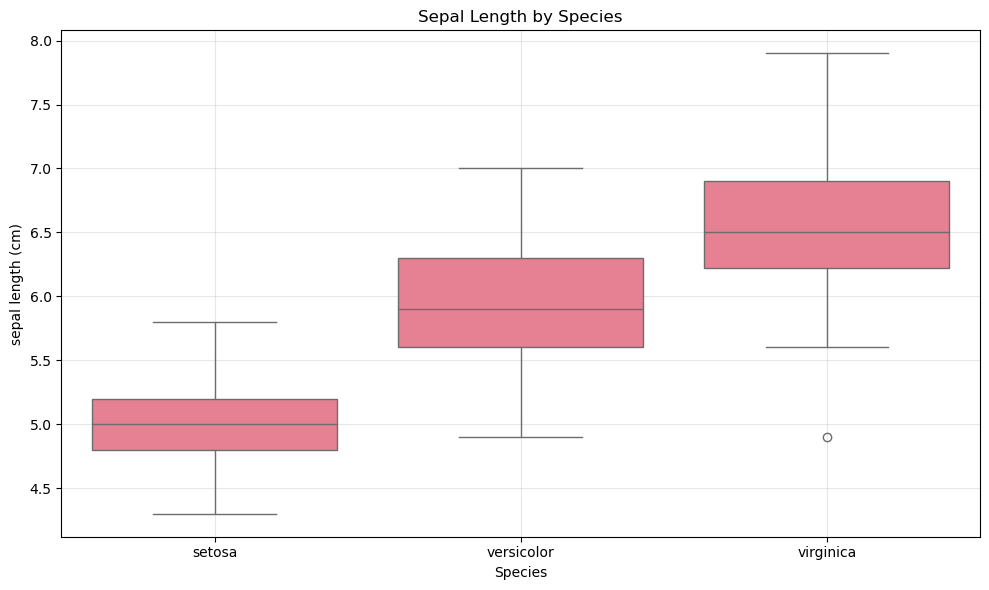

Plots saved to 'plots_output' directory:
- australia_breaches.png
- fish_caught.png
- iris_boxplot.png


In [62]:
# Export plots to files
import os

# Create output directory if it doesn't exist
output_dir = 'plots_output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save individual plots
fig1, ax1 = plt.subplots(figsize=(10, 6))
if 'df_breaches' in locals():
    ax1.plot(df_breaches['Year'], df_breaches['Australia'], 
             color='salmon', marker='o', linewidth=2, markersize=8)
    ax1.set_title('Data Breaches in Australia')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Breaches')
    ax1.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/australia_breaches.png', dpi=300, bbox_inches='tight')
    plt.show()

fig2, ax2 = plt.subplots(figsize=(10, 6))
if 'tot_fishers_tod' in locals():
    sns.barplot(data=tot_fishers_tod, x='num_fisher', y='fish_caught', hue='ToD', alpha=0.7, ax=ax2)
    ax2.set_title('Fish Caught by Number of Fishers and Time of Day')
    ax2.set_xlabel('Number of Fishers')
    ax2.set_ylabel('Total Fish Caught')
    plt.tight_layout()
    plt.savefig(f'{output_dir}/fish_caught.png', dpi=300, bbox_inches='tight')
    plt.show()

fig3, ax3 = plt.subplots(figsize=(10, 6))
if 'iris' in locals():
    sns.boxplot(data=iris, x='Species', y='sepal length (cm)', ax=ax3)
    ax3.set_title('Sepal Length by Species')
    ax3.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/iris_boxplot.png', dpi=300, bbox_inches='tight')
    plt.show()

print(f"Plots saved to '{output_dir}' directory:")
print("- australia_breaches.png")
print("- fish_caught.png") 
print("- iris_boxplot.png")